In [454]:
#usando os documentos direto do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

- Vimos os dados gerais dos datasets de óbitos e de Covid para escolher com qual trabalhar

- Escolhemos o Dataset de COVID para o estudo, por possuir mais dados e inferências possíveis

- Usamos o dataset de óbitos para comparar os estados com mais óbitos em 2020 com relação à população estimada

- Verificamos que os boletins do dataset de COVID são cumulativos (ou seja, o boletim do dia atual possui os dados do boletim anterior).

- Verificamos também que há boletins estaduais e municipais no mesmo dataset, motivo pelo qual separamos os mesmos.

- Verificamos ainda que há informações sem cidade especificada, e optamos por excluir estas informações do nosso dataset

- Criamos um dataset com o último boletim disponível por município e verificamos que há municípios que não atualizam as informações desde agosto.

- Calculamos os dados por 100k habitantes para poder comparar casos e mortes entre os estados

- Escolhemos 3 estados para fazer algumas análises de séries temporais. Como critério usamos os estados com maior e menor taxa de mortalidade por 100 mil habitantes, e o estado onde moro, respectivamente RJ, SC e PR. Vimos os gráficos de séries temporais dos 3 estados e suas respectivas capitais

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

### Importando Bibliotecas

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib.ticker as ticker #um formatador de ticks dos gráficos
import seaborn as sns

In [456]:
#chamando as opções de formatação numérica
#incluindo opções de visualização do pandas - globalmente
pd.options.display.float_format = "{:,.2f}".format

### Primeiras explorações

In [457]:
#Criando variáveis para os dois bancos de dados que vamos estudar para escolher qual vamos usar
fonte1 = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/obitos-registro-civil.csv'
fonte2 = '/content/drive/My Drive/Bootcamp/caso.csv.gz'
#optamos pelo caso.gsv.gz, atualizado até 10/11/2020


In [458]:
#lendo os dois datasets
obitos = pd.read_csv(fonte1) #óbitos por mês e estado no Brasil, desde 1970
covid = pd.read_csv(fonte2, compression = 'gzip') #casos de COVID19


In [459]:
#pegando uma amostra dos dados de covid para conhecer as variáveis
covid.sample(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
230223,2020-10-18,GO,Matrinchã,city,81,0,119,False,"4,351.00","4,336.00","5,212,956.00","1,868.08",0.00
574092,2020-10-04,RN,Florânia,city,115,6,111,False,"9,116.00","9,786.00","2,403,806.00","1,175.15",0.05
410062,2020-09-22,PI,Sebastião Barros,city,4,1,92,False,"3,469.00","3,451.00","2,210,623.00",115.91,0.25
159218,2020-06-30,BA,Teofilândia,city,144,0,47,False,"22,518.00","22,555.00","2,931,509.00",638.44,0.00
293440,2020-05-23,PA,Rio Maria,city,7,0,21,False,"18,193.00","18,201.00","1,506,161.00",38.46,0.00


In [460]:
#fazendo a mesma coisa para o dataset de óbitos
obitos.tail(5)

,year,month,state,deaths
15025,2020,8,RR,86
15026,2020,8,SC,4666
15027,2020,8,SP,31782
15028,2020,8,SE,1452
15029,2020,8,TO,741


#### Vendo o tamanho e as informações gerais dos datasets

In [461]:
#vendo quantas observações temos em cada um dos datasets
print(covid.shape, obitos.shape)
print(f'O dataset de dados da COVID possui {covid.shape[0]} observações e {covid.shape[1]} variáveis')
print(f'O dataset de dados de Óbitos possui {obitos.shape[0]} observações e {obitos.shape[1]} variáveis')

(951127, 13) (15030, 4)
O dataset de dados da COVID possui 951127 observações e 13 variáveis
O dataset de dados de Óbitos possui 15030 observações e 4 variáveis


Vamos usar o info() para saber os tipos de variável do dataset e também para ver se há algum dado nulo nos datasets que tenha de ser tratado. Como os dois datasets possuem uma relação com data, é uma oportunidade para ver se as colunas referentes a data são do tipo *datetime*.

In [462]:
#usando o info para saber os tipos de variáveis que possuímos
covid.info()
#deste resultado podemos ver que há dados faltantes nas colunas de cidade, população estimada em 2019, 
#população estimada, código da cidade no IBGE e mortes confirmadas por 100mil habitantes.
#minha primeira hipótese é que boa parte destes dados nulos estejam concentrados quando o tipo de lugar é estado e não município

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951127 entries, 0 to 951126
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            951127 non-null  object 
 1   state                           951127 non-null  object 
 2   city                            944667 non-null  object 
 3   place_type                      951127 non-null  object 
 4   confirmed                       951127 non-null  int64  
 5   deaths                          951127 non-null  int64  
 6   order_for_place                 951127 non-null  int64  
 7   is_last                         951127 non-null  bool   
 8   estimated_population_2019       947423 non-null  float64
 9   estimated_population            947423 non-null  float64
 10  city_ibge_code                  947423 non-null  float64
 11  confirmed_per_100k_inhabitants  933976 non-null  float64
 12  death_rate      

In [463]:
#não há nenhuma informação nula neste dataset
obitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15030 entries, 0 to 15029
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15030 non-null  int64 
 1   month   15030 non-null  int64 
 2   state   15030 non-null  object
 3   deaths  15030 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 469.8+ KB


#### A partir deste momento vamos trabalhar apenas com o Dataset de COVID, vamos usar o de óbitos só para fazer uma visualização dos óbitos em 2020 totais comparados com os óbitos por COVID

In [464]:
#conferindo nulos usando outra função - somente para o dataset de COVID
covid.isna().sum()

date                                  0
state                                 0
city                               6460
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3704
estimated_population               3704
city_ibge_code                     3704
confirmed_per_100k_inhabitants    17151
death_rate                            0
dtype: int64

In [465]:
#vou ver a porcentagem de observações nulas em 3 observações: Cidade, código da cidade no IBGE e mortes confirmadas
print(f'O percentual de dados nulos na coluna city é de {((covid.city.isna().sum()/covid.shape[0])*100).round(2)}%')
print(f'O percentual de dados nulos na coluna confirmed_per_100k_inhabitants é de {((covid.confirmed_per_100k_inhabitants.isna().sum()/covid.shape[0])*100).round(2)}%')
print(f'O percentual de dados nulos na coluna city_ibge_code é de {((covid.city_ibge_code.isna().sum()/covid.shape[0])*100).round(2)}%')


O percentual de dados nulos na coluna city é de 0.68%
O percentual de dados nulos na coluna confirmed_per_100k_inhabitants é de 1.8%
O percentual de dados nulos na coluna city_ibge_code é de 0.39%


Baseado na documentação do DataSet de casos de COVID no site, vamos excluir a coluna de população estimada em 2019, pois contém dados desatualizados e as outras medições usam a população estimada em 2020

In [466]:
#excluindo a coluna
dados = covid.drop('estimated_population_2019', axis=1)

Vamos também alterar a coluna date para que seja do tipo *datetime*

In [467]:
#convertendo para datetime
dados['date'] = pd.to_datetime(dados['date'], yearfirst=True)

Vamos incluir uma coluna com as mortes por 100K habitantes

In [468]:
dados['deaths_covid_per_100K_inhabitants'] = dados['deaths']/(dados['estimated_population']/100000)

In [469]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants
0,2020-11-10,AC,NaN,state,31926,704,239,True,"894,470.00",12.00,"3,569.26",0.02,78.71
1,2020-11-09,AC,NaN,state,31788,701,238,False,"894,470.00",12.00,"3,553.84",0.02,78.37
2,2020-11-08,AC,NaN,state,31707,699,237,False,"894,470.00",12.00,"3,544.78",0.02,78.15
3,2020-11-07,AC,NaN,state,31575,699,236,False,"894,470.00",12.00,"3,530.02",0.02,78.15
4,2020-11-06,AC,NaN,state,31326,697,235,False,"894,470.00",12.00,"3,502.19",0.02,77.92


Vamos fazer uma query no dataset para ver onde estão os nulos da coluna estimated_population

In [470]:
# vamos ver se podemos descartar estes boletins
query = dados.loc[dados['estimated_population'].isna()]
query.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants
20403,2020-11-09,DF,Importados/Indefinidos,city,26678,302,229,True,nan,nan,nan,0.01,nan
20404,2020-11-08,DF,Importados/Indefinidos,city,26634,302,228,False,nan,nan,nan,0.01,nan
20405,2020-11-07,DF,Importados/Indefinidos,city,26573,301,227,False,nan,nan,nan,0.01,nan
20406,2020-11-06,DF,Importados/Indefinidos,city,26478,297,226,False,nan,nan,nan,0.01,nan
20407,2020-11-05,DF,Importados/Indefinidos,city,26450,297,225,False,nan,nan,nan,0.01,nan


In [471]:
#vendo quais os outros dados nulos que possuímos
query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3704 entries, 20403 to 877808
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               3704 non-null   datetime64[ns]
 1   state                              3704 non-null   object        
 2   city                               3704 non-null   object        
 3   place_type                         3704 non-null   object        
 4   confirmed                          3704 non-null   int64         
 5   deaths                             3704 non-null   int64         
 6   order_for_place                    3704 non-null   int64         
 7   is_last                            3704 non-null   bool          
 8   estimated_population               0 non-null      float64       
 9   city_ibge_code                     0 non-null      float64       
 10  confirmed_per_100k_inhabitants

In [472]:
#conferir se a coluna confirmed e a coluna deaths é igual
query.death_rate.nunique() #fui pela coluna death rate pois ela é uma divisão entre os dados de confirmados e óbitos

576

In [473]:
#outro jeito de fazer a confirmação
query.death_rate.equals(query.confirmed)

False

In [474]:
#conferindo quais as cidades neste subset
query.city.unique()

array(['Importados/Indefinidos'], dtype=object)

In [475]:
#vendo o tipo de lugar no dataset
query.place_type.unique()

array(['city'], dtype=object)

conforme a documentação do dataset, city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também). Neste caso a hipótese é que se eu puxar todos os Importados/Indefinidos eu vou ter o mesmo dataset da minha query de população estimada nula

In [476]:
#fazendo um subset com todas as observações de cidade como Importados/Indefinidos
cidade_indefinida = dados[dados.city == 'Importados/Indefinidos']

In [477]:
#conferindo se o query é igual ao cidade_indefinida
query.equals(cidade_indefinida)

True

Neste caso, minha hipótese se confirmou. Vamos levantar uma nova hipótese de que quando a cidade for nula no dataset o tipo de lugar será sempre state

In [478]:
#criando um subset com todas as cidades nulas
cidade_nula = dados[dados.city.isna()]
#criando um subset com todas as observações com tipo de lugar = state
tipo_estado = dados[dados.place_type == 'state']


In [479]:
#conferindo minha hipótese:
cidade_nula.equals(tipo_estado)

True

In [480]:
#conferindo quantas informações nós temos no dataset estadual
tipo_estado.shape

(6460, 13)

In [481]:
#conferindo qual o espaço de tempo entre a observação mais antiga e a observação mais recente
dados.date.max() - dados.date.min()

Timedelta('259 days 00:00:00')

In [482]:
#vendo quantas observações por estado deveríamos ter se todos os estados tivessem informações todos os dias
(dados.date.max() - dados.date.min())*27

Timedelta('6993 days 00:00:00')

In [483]:
#dividindo os dados entre dados por estado e dados por município
dados_por_estado = tipo_estado.drop('city', axis=1)
dados_por_cidade = dados[dados.place_type == 'city']
dados_por_cidade_definida = dados_por_cidade[dados_por_cidade.city != 'Importados/Indefinidos']

In [484]:
#conferindo quantas informações ficaram nos municípios
dados_por_cidade.shape

(944667, 13)

In [485]:
#conferindo quantos casos confirmados e quantos óbitos por estado eu vou perder se eu excluir os dados da nossa query
#conferindo a soma de casos confirmados nos 4 datasets.
#lembrando que não estamos falando do total de casos confirmados pois isso só teremos com a soma de dados pelo último boletim
print(f'a soma de casos confirmados quando a cidade é indefinida é de: {cidade_indefinida.confirmed.sum()}')
print(f'a soma de casos confirmados quando o tipo de lugar é estado é de: {dados_por_estado.confirmed.sum()}')
print(f'a soma de casos confirmados quando a cidade é definida é de: {dados_por_cidade_definida.confirmed.sum()}')
print(f'a soma de casos confirmados quando a tipo de lugar é cidade, seja definida ou indefinida: {dados_por_cidade.confirmed.sum()}')

a soma de casos confirmados quando a cidade é indefinida é de: 4819437
a soma de casos confirmados quando o tipo de lugar é estado é de: 544401466
a soma de casos confirmados quando a cidade é definida é de: 481272056
a soma de casos confirmados quando a tipo de lugar é cidade, seja definida ou indefinida: 486091493


In [486]:
#conferindo a soma de óbitos nos 4 datasets.
#lembrando que não estamos falando do total de óbitos pois isso só teremos com a soma de dados pelo último boletim
print(f'a soma de mortes quando a cidade é indefinida é de: {cidade_indefinida.deaths.sum()}')
print(f'a soma de mortes quando o tipo de lugar é estado é de: {dados_por_estado.deaths.sum()}')
print(f'a soma de mortes quando a cidade é definida é de: {dados_por_cidade_definida.deaths.sum()}')
print(f'a soma de mortes quando a tipo de lugar é cidade, seja definida ou indefinida: {dados_por_cidade.deaths.sum()}')

a soma de mortes quando a cidade é indefinida é de: 53661
a soma de mortes quando o tipo de lugar é estado é de: 17733658
a soma de mortes quando a cidade é definida é de: 15923314
a soma de mortes quando a tipo de lugar é cidade, seja definida ou indefinida: 15976975


As informações de soma me dizem que os boletins possuem dados acumulados de casos confirmados e óbitos.

Considerando que percentual de dados perdidos se eu excluir as informações sem cidade definida fica muito próximo de 0% eu vou optar por usar apenas os dados em que a cidade está definida. A partir de agora vou trabalhar com os dados estaduais e os dados municipais

### Comparando os Estados com mais óbitos em 2020 até agosto  com sua população estimada

Para isso vou usar o dataset de Óbitos (filtrando por ano e estado e a população estimada por estado

In [487]:
#testando uma seleção no dados por estado, pela coluna que define se é o último boletim, para ver se temos pelo menos uma linha por estado
ultimo_boletim_estadual = dados_por_estado.query('is_last == True')
ultimo_boletim_estadual.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants
0,2020-11-10,AC,state,31926,704,239,True,"894,470.00",12.00,"3,569.26",0.02,78.71
4340,2020-11-10,AP,state,53574,766,231,True,"861,773.00",16.00,"6,216.72",0.01,88.89
7670,2020-11-10,AM,state,166771,4650,238,True,"4,207,714.00",13.00,"3,963.46",0.03,110.51
19908,2020-11-10,DF,state,217370,3775,248,True,"3,055,149.00",53.00,"7,114.87",0.02,123.56
20632,2020-11-10,AL,state,91939,2278,245,True,"3,351,543.00",27.00,"2,743.18",0.02,67.97


In [488]:
#criando uma query com o último boletim de agosto
ultimo_boletim_estadual_agosto = dados_por_estado.query('date == "2020-08-31"')
ultimo_boletim_estadual_agosto.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants
71,2020-08-31,AC,state,24647,612,168,False,"894,470.00",12.00,"2,755.49",0.02,68.42
4407,2020-08-31,AP,state,43193,661,164,False,"861,773.00",16.00,"5,012.11",0.02,76.70
7740,2020-08-31,AM,state,120296,3649,168,False,"4,207,714.00",13.00,"2,858.94",0.03,86.72
19979,2020-08-31,DF,state,162042,2521,177,False,"3,055,149.00",53.00,"5,303.90",0.02,82.52
20703,2020-08-31,AL,state,78804,1887,174,False,"3,351,543.00",27.00,"2,351.28",0.02,56.30


In [489]:
#vendo se tenho os 27 estados e 27 observações
print(f'A quantidade de estados representados no último boletim é {ultimo_boletim_estadual.state.nunique()}') 
print(f'A quantidade de observações estaduais que são consideradas o último boletim é de: {ultimo_boletim_estadual.shape[0]}')

A quantidade de estados representados no último boletim é 27
A quantidade de observações estaduais que são consideradas o último boletim é de: 27


In [490]:
#vendo se tenho os 27 estados e 27 observações
print(f'A quantidade de estados representados no último boletim de agosto é {ultimo_boletim_estadual_agosto.state.nunique()}') 
print(f'A quantidade de observações estaduais que são consideradas o último boletim de agosto é de: {ultimo_boletim_estadual_agosto.shape[0]}')

A quantidade de estados representados no último boletim de agosto é 27
A quantidade de observações estaduais que são consideradas o último boletim de agosto é de: 27


In [491]:
#capturando os óbitos de 2020
obitos_2020 = obitos.query('year == 2020')

In [492]:
#criando um DF com a soma de mortes por estado (até agosto)
obitos_por_estado_2020 = obitos_2020.groupby(by='state')['deaths'].sum().to_frame().reset_index()

In [493]:
#incluindo os óbitos totais no nosso último boletim de agosto para que os dados fiquem emparelhados
covid_agosto_com_obitos_totais = ultimo_boletim_estadual_agosto.merge(obitos_por_estado_2020, on='state')

In [494]:
covid_agosto_com_obitos_totais.columns

Index(['date', 'state', 'place_type', 'confirmed', 'deaths_x',
       'order_for_place', 'is_last', 'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate',
       'deaths_covid_per_100K_inhabitants', 'deaths_y'],
      dtype='object')

In [495]:
#alterando o nome das colunas
covid_agosto_com_obitos_totais.columns = ['date', 'state', 'place_type', 'confirmed', 'deaths_covid',
       'order_for_place', 'is_last', 'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate',
       'deaths_covid_per_100K_inhabitants', 'deaths_total']

In [496]:
#criando uma coluna com o percentual de mortes por covid  no total de mortes
covid_agosto_com_obitos_totais['rate_deaths_by_covid'] = covid_agosto_com_obitos_totais['deaths_covid']/covid_agosto_com_obitos_totais['deaths_total']

In [497]:
#criando uma coluna para as mortes totais por 100k habitantes
covid_agosto_com_obitos_totais['deaths_total_per_100K_inhabitants'] = covid_agosto_com_obitos_totais['deaths_total']/(covid_agosto_com_obitos_totais['estimated_population']/100000)

In [498]:
covid_agosto_com_obitos_totais.head()

,date,state,place_type,confirmed,deaths_covid,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants,deaths_total,rate_deaths_by_covid,deaths_total_per_100K_inhabitants
0,2020-08-31,AC,state,24647,612,168,False,"894,470.00",12.00,"2,755.49",0.02,68.42,3250,0.19,363.34
1,2020-08-31,AP,state,43193,661,164,False,"861,773.00",16.00,"5,012.11",0.02,76.70,2214,0.30,256.91
2,2020-08-31,AM,state,120296,3649,168,False,"4,207,714.00",13.00,"2,858.94",0.03,86.72,13336,0.27,316.94
3,2020-08-31,DF,state,162042,2521,177,False,"3,055,149.00",53.00,"5,303.90",0.02,82.52,12152,0.21,397.75
4,2020-08-31,AL,state,78804,1887,174,False,"3,351,543.00",27.00,"2,351.28",0.02,56.30,14031,0.13,418.64


In [499]:
#conferindo o percentual mínimo e o máximo de mortes por covid entre os estados
covid_agosto_com_obitos_totais.rate_deaths_by_covid.min(), covid_agosto_com_obitos_totais.rate_deaths_by_covid.max()

(0.05711767738073463, 0.3037909836065574)

In [500]:
#conferindo quais são os estados com menor e maior percentual
menor = covid_agosto_com_obitos_totais.query('rate_deaths_by_covid == rate_deaths_by_covid.min()')['state']
maior = covid_agosto_com_obitos_totais.query('rate_deaths_by_covid == rate_deaths_by_covid.max()')['state']
print(menor)
print(maior)

24    RS
Name: state, dtype: object
21    RR
Name: state, dtype: object


In [501]:
#conferindo a média
covid_agosto_com_obitos_totais.rate_deaths_by_covid.mean()*100

16.601077571441486

In [502]:
#conferindo a mediana
covid_agosto_com_obitos_totais.rate_deaths_by_covid.median()*100

16.46592627352834

In [503]:
#conferindo o desvio padrão
covid_agosto_com_obitos_totais.rate_deaths_by_covid.std()*100

7.122323050418059

As mortes por COVID até agosto representam entre 5 e 30% dos óbitos nos estados, sendo o menor percentual no Rio Grande do Sul e o maior percentual em Roraima, sendo que na média, a COVID representa 16,60% dos óbitos no final de agosto, com desvio padrão de 7,12 pontos percentuais.

<Figure size 576x576 with 0 Axes>

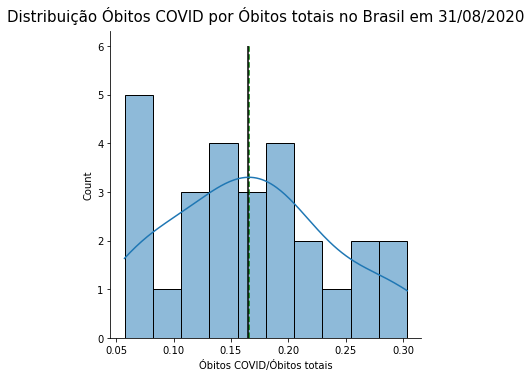

In [504]:
#vamos fazer uma análise da distribuição do percentual de mortes por COVID
plt.figure(figsize=(8,8));
#cria o gráfico
sns.displot(covid_agosto_com_obitos_totais.rate_deaths_by_covid, bins=10, kde=True)
#incluindo as linhas de média e mediana
plt.vlines(x = [covid_agosto_com_obitos_totais.rate_deaths_by_covid.mean(),
                covid_agosto_com_obitos_totais.rate_deaths_by_covid.median()],
           ymin=0, ymax=6, colors=['g', 'k'],linestyles=['--', '-'])
plt.title('Distribuição Óbitos COVID por Óbitos totais no Brasil em 31/08/2020', fontsize=15, pad=10)
plt.xlabel('Óbitos COVID/Óbitos totais')
plt.show()


Vemos no gráfico acima que a Média e a Mediana dos valores nesta distribuição estão muito próximos, mas que há um número relativamente alto de estados cujo percentual é menor do que 0.10, motivo pelo qual vamos visualizar essa informação por estados

In [505]:
#como são poucos estados, podemos visualizar os dados apenas na tabela, mas farei um plot com estes dados
taxa_mortes = covid_agosto_com_obitos_totais[['state', 'rate_deaths_by_covid']].sort_values(by='rate_deaths_by_covid')
taxa_mortes

,state,rate_deaths_by_covid
24,RS,0.06
16,MG,0.06
20,PR,0.07
23,SC,0.08
10,MS,0.08
7,BA,0.09
9,GO,0.12
13,PB,0.13
26,SP,0.13
4,AL,0.13


Visualizando as taxas de mortalidade por COVID em relação ao total de óbitos por estado num gráfico de barras

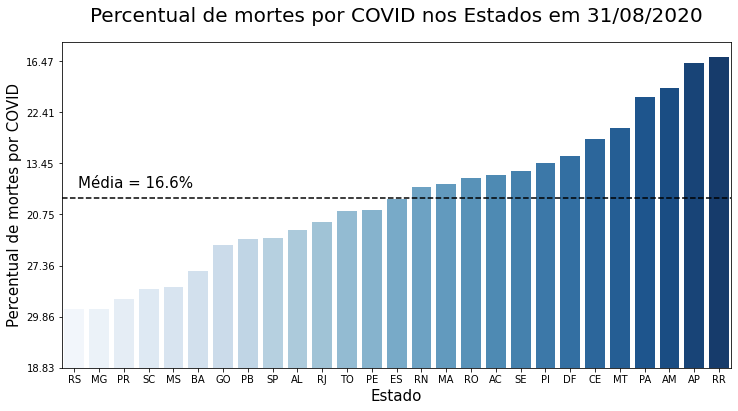

In [506]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='state', y='rate_deaths_by_covid', data=taxa_mortes, palette='Blues')
plt.title('Percentual de mortes por COVID nos Estados em 31/08/2020', fontsize=20, pad=20);
#incluindo as linhas de média
ax.axhline(y = covid_agosto_com_obitos_totais.rate_deaths_by_covid.mean(),
           color='k',linestyle='--',label='Média')
ax.set_yticklabels((covid_agosto_com_obitos_totais.rate_deaths_by_covid*100).round(2))
ax.set_ylabel('Percentual de mortes por COVID', fontsize=15)
ax.set_xlabel('Estado', fontsize=15)
#criando uma anotação
x1 = covid_agosto_com_obitos_totais.rate_deaths_by_covid.mean()
y1 = covid_agosto_com_obitos_totais.rate_deaths_by_covid.mean() +0.01
ax.annotate(f'Média = {round(covid_agosto_com_obitos_totais.rate_deaths_by_covid.mean()*100, 2)}%', xy=(x1,y1), fontsize=15);

In [507]:
#soma de casos confirmados no último boletim
ultimo_boletim_estadual.confirmed.sum()

5703616

In [508]:
#soma de casos confirmados no último boletim de agosto
ultimo_boletim_estadual_agosto.confirmed.sum()

3914829

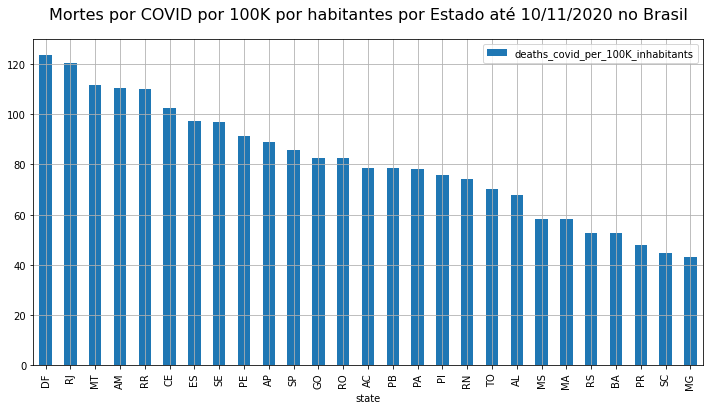

In [509]:
#vamos visualizar os estados pela quantidade de mortes por covid por 100k habitantes
ultimo_boletim_estadual.sort_values(by='deaths_covid_per_100K_inhabitants',
                                    ascending = False).plot(x='state', 
                                                            y='deaths_covid_per_100K_inhabitants', 
                                                            kind='bar', 
                                                            figsize=(12,6), grid=True);
plt.title('Mortes por COVID por 100K por habitantes por Estado até 10/11/2020 no Brasil', fontsize=16, pad=20);

Vemos pelo gráfico acima que o DF é o estado com mais mortes por 100mil habitantes, enquanto MG é o estado com menos mortes por 100mil habitantes.

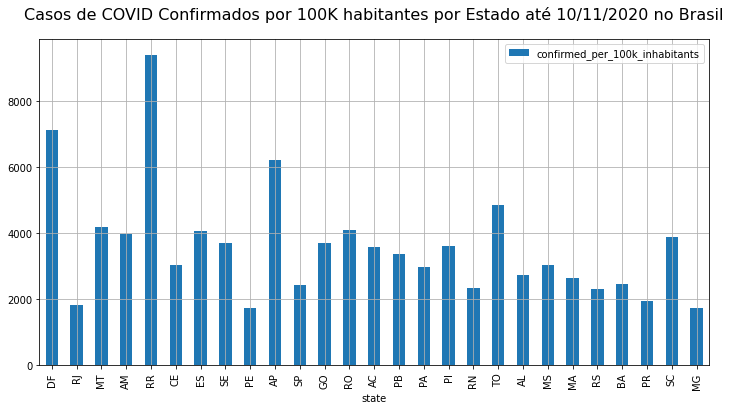

In [510]:
#vamos visualizar os estados pela quantidade de mortes por covid por 100k habitantes
ultimo_boletim_estadual.sort_values(by='deaths_covid_per_100K_inhabitants',
                                    ascending = False).plot(x='state', 
                                                            y='confirmed_per_100k_inhabitants', 
                                                            kind='bar', 
                                                            figsize=(12,6), grid=True);
plt.title('Casos de COVID Confirmados por 100K habitantes por Estado até 10/11/2020 no Brasil', fontsize=16, pad=20);

Ao organizamos o gráfico de casos confirmados por 100K por estado pela quantidade de mortes por 100mil habitantes, vemos que a taxa de mortalidade não é a mesma entre os estados, o que pode indicar, entre outras coisas, a falta de testes.  Vamor reorganizar o gráfico anterior para visualizar qual o estado com o maior e o menor número de casos confirmados por 100mil

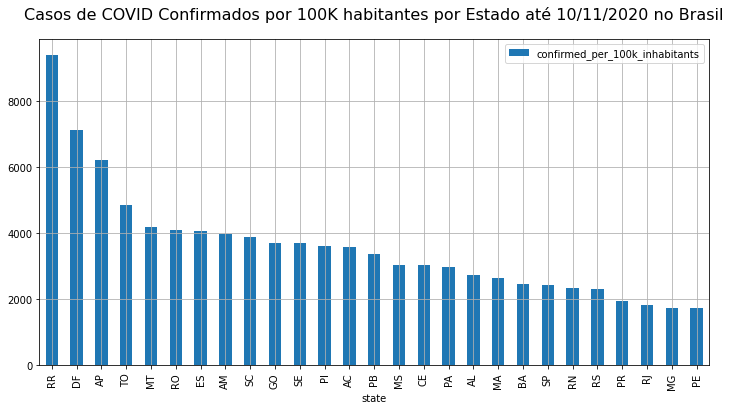

In [511]:
#vamos visualizar os estados pela quantidade de casos confirmados por covid por 100k habitantes
ultimo_boletim_estadual.sort_values(by='confirmed_per_100k_inhabitants',
                                    ascending = False).plot(x='state', 
                                                            y='confirmed_per_100k_inhabitants', 
                                                            kind='bar', 
                                                            figsize=(12,6), grid=True);
plt.title('Casos de COVID Confirmados por 100K habitantes por Estado até 10/11/2020 no Brasil', fontsize=16, pad=20);

Neste caso Roraima é o estado com a maior taxa de casos confirmados por 100K habitantes. Interessante lembrar que é também o estado com a maior taxa de mortes por COVID dentre o total de mortes em agosto. Já Pernambuco é o estado com a menor taxa de casos confirmados por 100K habitantes, mas o novo estado por número de mortes por 100K

Vamos agora visualizar a taxa de mortalidade, por estado

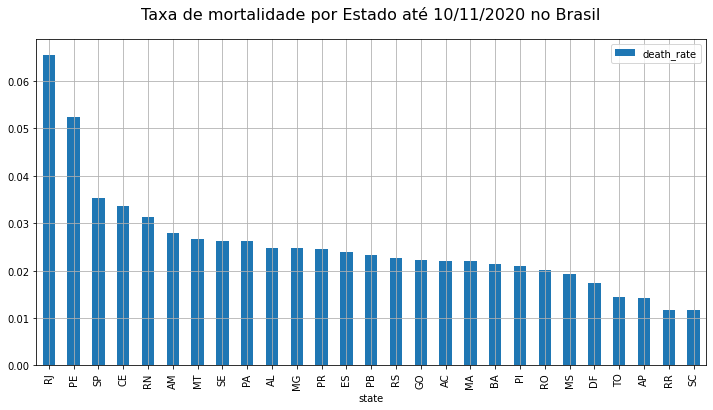

In [512]:
#vamos visualizar os estados pela quantidade de casos confirmados por covid por 100k habitantes
ultimo_boletim_estadual.sort_values(by='death_rate',
                                    ascending = False).plot(x='state', 
                                                            y='death_rate', 
                                                            kind='bar', 
                                                            figsize=(12,6), grid=True);
plt.title('Taxa de mortalidade por Estado até 10/11/2020 no Brasil', fontsize=16, pad=20);


O estado com a maior taxa de mortalidade é o Rio de Janeiro e o estado com a menor taxa de mortalidade é Santa Catarina. Podemos ver essa relação considerando que ele é o segundo estado com o maior número de mortes por 100K, mas o 25º em número de casos confirmados

### Buscando o último boletim por município

In [513]:
#criando um dataset apenas com o último boletim por cidade
ultimo_boletim_municipal = dados_por_cidade_definida.query('is_last == True')

In [514]:
#vamos ver quantas cidades únicas temos nesse dataset
ultimo_boletim_municipal.city.nunique()

5295

In [515]:
#vamos ver quantas cidades únicas a gente tem no dataset de onde tiramos os dados únicos
dados_por_cidade_definida.city.nunique()

5295

In [516]:
#buscando quais são as cidades duplicadas
ultimo_boletim_municipal['duplicado'] = ultimo_boletim_municipal.duplicated('city')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [517]:
#vendo a quantidade de cidades duplicadas
ultimo_boletim_municipal.query('duplicado == True').shape

(273, 14)

In [518]:
#vendo a lista de cidades duplicadas
duplicadas = list(ultimo_boletim_municipal.query('duplicado == True')['city'])
print(duplicadas)

['Milagres', 'Santana', 'Presidente Dutra', 'Santa Inês', 'Santa Luzia', 'Viana', 'Barro Alto', 'Davinópolis', 'Hidrolândia', 'Jussara', 'Morrinhos', 'Mundo Novo', 'Piranhas', 'São Domingos', 'Bonito', 'Campo Grande', 'Jardim', 'Mundo Novo', 'Canarana', 'Rio Branco', 'Belém', 'Bonito', 'Redenção', 'Barra de São Miguel', 'Belém', 'Conde', 'Mulungu', 'Nova Olinda', 'Pedra Branca', 'Pilar', 'Queimadas', 'Riachão', 'Santa Helena', 'Santa Inês', 'Santa Luzia', 'Santa Rita', 'Santa Teresinha', 'São Bento', 'São Domingos', 'Taperoá', 'Água Branca', 'Alagoinha', 'Bom Jardim', 'Bonito', 'Cedro', 'Condado', 'Itambé', 'Jatobá', 'Paulista', 'Primavera', 'Quixaba', 'Salgadinho', 'Santa Cruz', 'Santa Terezinha', 'Terra Nova', 'Trindade', 'Triunfo', 'Batalha', 'Bom Jesus', 'Caracol', 'Jurema', 'Novo Santo Antônio', 'Santa Filomena', 'Várzea Grande', 'Água Branca', 'Boa Esperança', 'Bom Sucesso', 'Cachoeira Dourada', 'Campestre', 'Candeias', 'Canápolis', 'Formoso', 'Lagoa Grande', 'Lagoa Santa', 'Ouro

### Próximo passo: Verificar qual dos dados entre as cidades duplicadas é o mais recente para manter no dataset

fonte da solução sugerida: https://stackoverflow.com/questions/52395820/drop-duplicates-keep-most-recent-date-pandas-dataframe

In [519]:
#solução sugerida 
#df.sort_values('DATE_CHANGED').drop_duplicates('STATION_ID',keep='last')
dados_municipio_mais_recentes = ultimo_boletim_municipal.sort_values('date').drop_duplicates(['city'],keep='last')
dados_municipio_mais_recentes.head()


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants,duplicado
267920,2020-08-10,MT,Nova Maringá,city,32,0,72,True,"8,850.00","5,108,907.00",361.58,0.00,0.00,False
264941,2020-08-10,MT,Denise,city,79,2,75,True,"9,544.00","5,103,452.00",827.75,0.03,20.96,False
265016,2020-08-10,MT,Diamantino,city,188,6,66,True,"22,178.00","5,103,502.00",847.69,0.03,27.05,False
265082,2020-08-10,MT,Dom Aquino,city,86,3,81,True,"8,159.00","5,103,601.00","1,054.05",0.03,36.77,False
265163,2020-08-10,MT,Feliz Natal,city,175,3,63,True,"14,522.00","5,103,700.00","1,205.07",0.02,20.66,False


In [520]:
#imprimindo algumas informações sobre o novo dataset
print(f'O dataset dados_municipio_mais_recentes possui {dados_municipio_mais_recentes.shape[0]} linhas e {dados_municipio_mais_recentes.shape[1]} colunas')
print(f'O dataset dados_municipio_mais_recentes possui informações de {dados_municipio_mais_recentes.city.nunique()} cidades')
print(f'O dataset dados_municipio_mais_recentes possui dados cujas datas variam entre as datas de {dados_municipio_mais_recentes.date.min()} a  {dados_municipio_mais_recentes.date.max()}')


O dataset dados_municipio_mais_recentes possui 5295 linhas e 14 colunas
O dataset dados_municipio_mais_recentes possui informações de 5295 cidades
O dataset dados_municipio_mais_recentes possui dados cujas datas variam entre as datas de 2020-08-10 00:00:00 a  2020-11-09 00:00:00


In [521]:
#vendo quantas datas diferentes possuímos no dataset novo
dados_municipio_mais_recentes.date.nunique()

13

In [522]:
#vendo quais são essas datas
dados_municipio_mais_recentes.date.unique()

array(['2020-08-10T00:00:00.000000000', '2020-09-26T00:00:00.000000000',
       '2020-10-23T00:00:00.000000000', '2020-10-28T00:00:00.000000000',
       '2020-10-29T00:00:00.000000000', '2020-10-30T00:00:00.000000000',
       '2020-11-02T00:00:00.000000000', '2020-11-03T00:00:00.000000000',
       '2020-11-04T00:00:00.000000000', '2020-11-05T00:00:00.000000000',
       '2020-11-06T00:00:00.000000000', '2020-11-08T00:00:00.000000000',
       '2020-11-09T00:00:00.000000000'], dtype='datetime64[ns]')

Possuímos 13 boletins diferentes como os dados mais recentes das cidades, sendo 01 em agosto, 01 em setembro, 04 em outubro e 07 em novembro, o que quer dizer que algumas datas estão bem defasadas.

In [523]:
#conferindo se os dados de agosto são realmente os mais recentes
dados.query('city == "Denise"').sort_values('date').tail(1)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants
264941,2020-08-10,MT,Denise,city,79,2,75,True,"9,544.00","5,103,452.00",827.75,0.03,20.96


Nesta análise vimos que temos dados de cidades que só possuem atualização até agosto, vamos ver duas coisas: 

1.   Quantas cidades tem dados anteriores a 05-Nov-2020
2.   Qual a última atualização dos Estados onde estas cidades se encontram




In [524]:
#criando a base com os boletins defasados
boletins_defasados = dados_municipio_mais_recentes.query('date <= "2020-11-05"')

In [525]:
print(f'Há {boletins_defasados.shape[0]} cidades cujos dados mais recentes são anteriores a 05/11/2020')

Há 1874 cidades cujos dados mais recentes são anteriores a 05/11/2020


In [526]:
#vendo quantas cidades não possuem dados de novembro
boletins_anteriores_outubro = dados_municipio_mais_recentes.query('date < "2020-10-31"')

In [527]:
print(f'Há {boletins_anteriores_outubro.shape[0]} cidades que que não possuem dados de novembro')

Há 854 cidades que que não possuem dados de novembro


In [528]:
#conferindo se os boletins estaduais estão atualizados
ultimo_boletim_estadual.date.unique()

array(['2020-11-10T00:00:00.000000000', '2020-11-09T00:00:00.000000000',
       '2020-11-05T00:00:00.000000000'], dtype='datetime64[ns]')

### Comparando evolução da COVID nos estados com maior e menor taxa de mortalidade por 100K (com relação aos casos confirmados)

Vamos voltar agora a nossa análise para séries temporais. Para isto, vou pegar os dados dos estados nos dois extremos da taxa de mortalidade de COVID por 100K habitantes (com relação aos casos confirmados), ou seja, Rio de Janeiro e Santa Catarina, e vou compará-los com o estado onde moro (Paraná). Para tanto, vou usar os dados estaduais.

In [529]:
#criando 3 datasets por estado. Vou manter as colunas "date, confirmed, deaths, confirmed_per_100k_inhabitants e deaths_covid_per_100k_inhabitants"
colunas = ['date', 'confirmed', 'deaths', 'confirmed_per_100k_inhabitants', 'deaths_covid_per_100K_inhabitants']
rio_de_janeiro = dados_por_estado.query('state == "RJ"').sort_values('date')[colunas]
santa_catarina = dados_por_estado.query('state == "SC"').sort_values('date')[colunas]
parana = dados_por_estado.query('state == "PR"').sort_values('date')[colunas]

In [530]:
#conferindo o tamanho destes datasets
print(f'Shape Rio de Janeiro: {rio_de_janeiro.shape}')
print(f'Shape Santa Catarina: {santa_catarina.shape}')
print(f'Shape Paraná: {parana.shape}')

Shape Rio de Janeiro: (241, 5)
Shape Santa Catarina: (243, 5)
Shape Paraná: (242, 5)


In [531]:
parana.head()

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants
601130,2020-03-12,6,0,0.05,0.00
601129,2020-03-13,6,0,0.05,0.00
601128,2020-03-16,6,0,0.05,0.00
601127,2020-03-17,12,0,0.10,0.00
601126,2020-03-18,14,0,0.12,0.00


In [532]:
#criando uma coluna de aumento e aceleração dos dados confirmados e dados de mortes nos 3 datasets que criei
#criando uma lista de datasets
datasets = [rio_de_janeiro, santa_catarina, parana]
#criando uma lista de colunas
columns = ['confirmed', 'deaths', 'confirmed_per_100k_inhabitants', 'deaths_covid_per_100K_inhabitants']
for dataset in datasets: #para cada dataset da minha lista
  for column in columns: #para cada coluna na minha lista de colunas
    dataset[f'diff_{column}'] = dataset[column].diff() #crie uma coluna de aumento
    dataset[f'acceleration_{column}'] = dataset[f'diff_{column}'].diff()#crie uma coluna de aceleração



Aumento e Aceleração permitem que visualizemos melhor a evolução dos casos. O aumento reduz o dia anterior do dia atual e a aceleração faz a mesma coisa com o aumento. 

In [533]:
#visualizando se meus for deram certo
rio_de_janeiro.head(3)

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants
549291,2020-03-05,1,0,0.01,0.00,nan,nan,nan,nan,nan,nan,nan,nan
549290,2020-03-06,2,0,0.01,0.00,1.00,nan,0.00,nan,0.01,nan,0.00,nan
549289,2020-03-08,3,0,0.02,0.00,1.00,0.00,0.00,0.00,0.01,-0.00,0.00,0.00


In [534]:
santa_catarina.head(3)

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants
680421,2020-03-12,2,0,0.03,0.00,nan,nan,nan,nan,nan,nan,nan,nan
680420,2020-03-13,3,0,0.04,0.00,1.00,nan,0.00,nan,0.01,nan,0.00,nan
680419,2020-03-14,5,0,0.07,0.00,2.00,1.00,0.00,0.00,0.03,0.01,0.00,0.00


In [535]:
parana.head(3)

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants
601130,2020-03-12,6,0,0.05,0.00,nan,nan,nan,nan,nan,nan,nan,nan
601129,2020-03-13,6,0,0.05,0.00,0.00,nan,0.00,nan,0.00,nan,0.00,nan
601128,2020-03-16,6,0,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [536]:
#criando uma função de plot comparativo - fonte cursos alura
def plot_comparacao(x, y1, y2,y3, dataset,titulo):
  plt.figure(figsize=(12,16))
  ax = plt.subplot(3,1,1) #3 linhas, um gráfico por linha
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data = dataset)
  ax=ax

#### Casos Confirmados

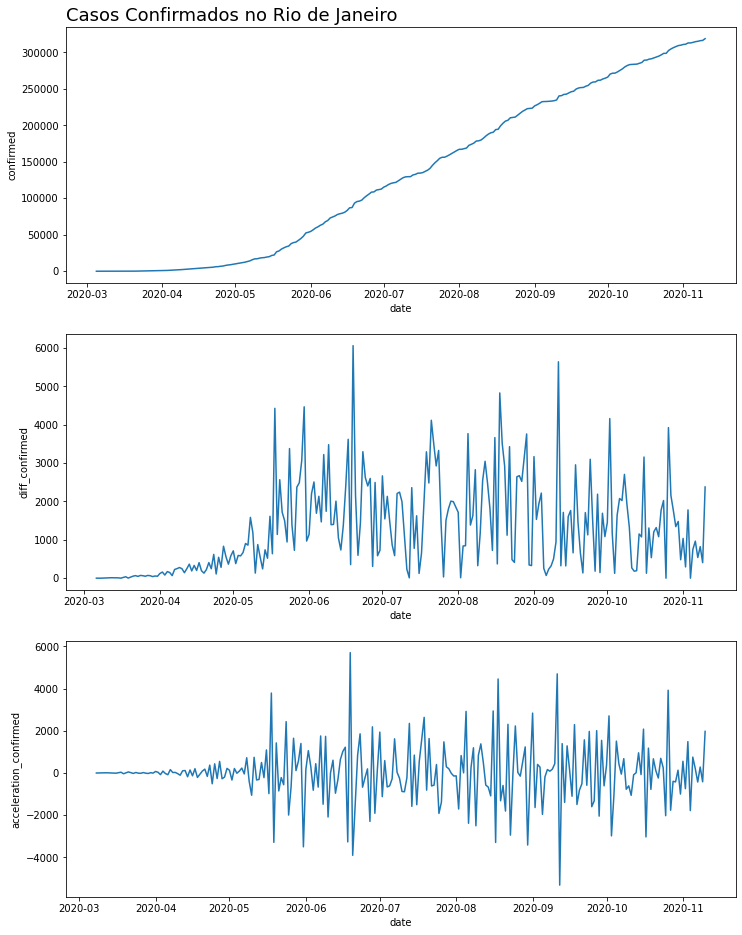

In [537]:
plot_comparacao('date', 'confirmed', 'diff_confirmed', 'acceleration_confirmed', rio_de_janeiro, 'Casos Confirmados no Rio de Janeiro')

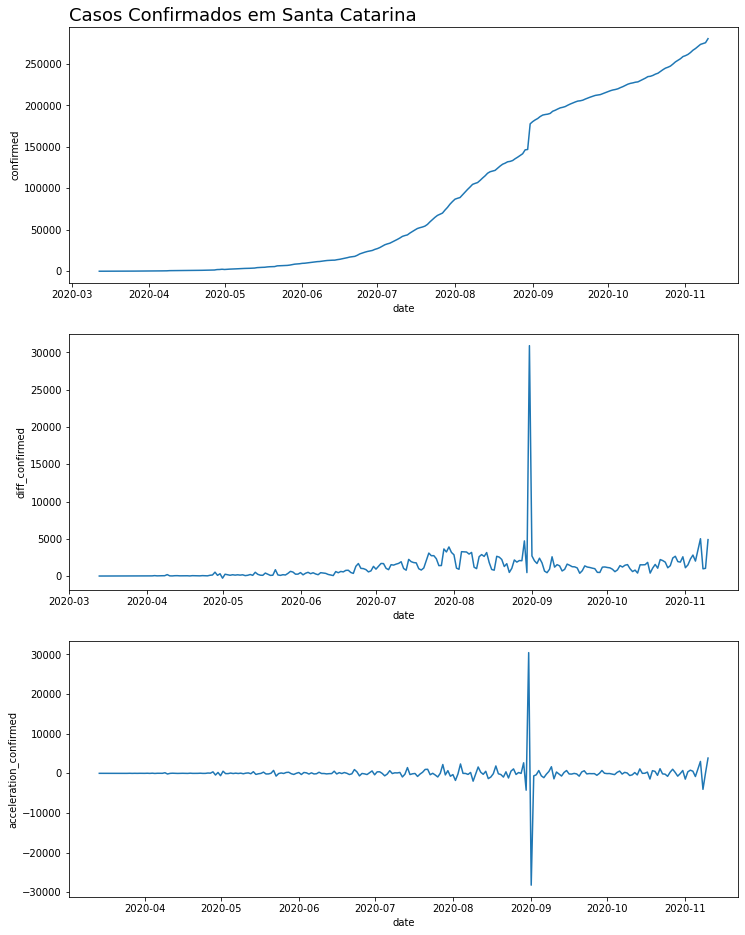

In [538]:
plot_comparacao('date', 'confirmed', 'diff_confirmed', 'acceleration_confirmed', santa_catarina, 'Casos Confirmados em Santa Catarina')

Notamos um pico de casos em torno de setembro em Santa Catarina e temos que investigar o que houve neste período.

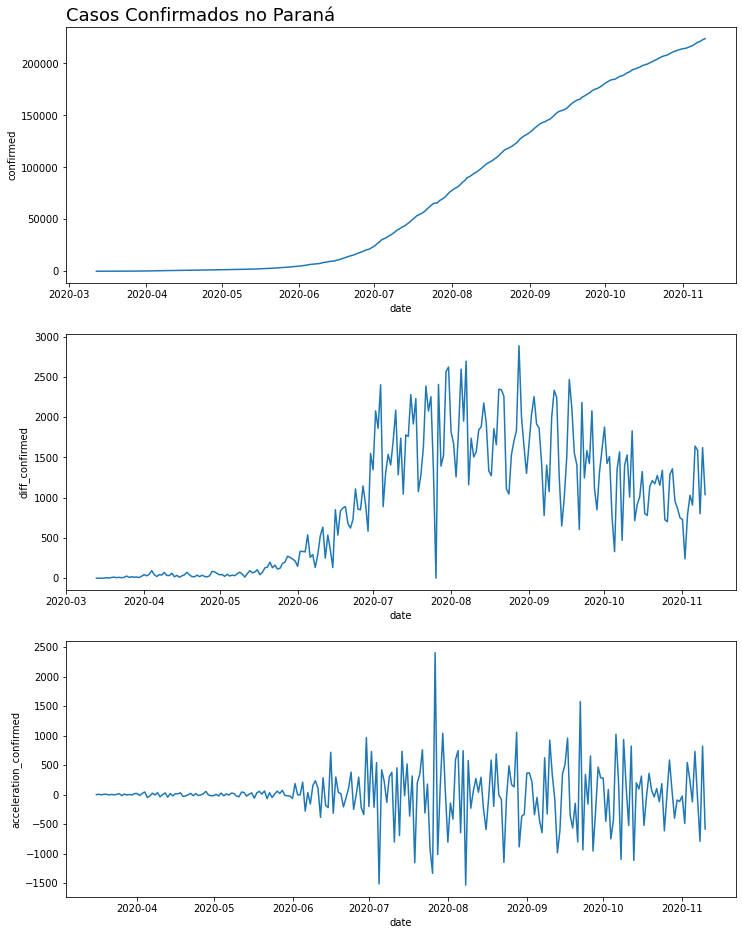

In [539]:
plot_comparacao('date', 'confirmed', 'diff_confirmed', 'acceleration_confirmed', parana, 'Casos Confirmados no Paraná')

Já no Paraná temos um pico negativo no aumento de casos entre julho e agosto, que também deve ser investigado

Interessante notar a diferença entre as escalas dos estados. Enquanto o RJ o aumento vai de 0 a 6000 casos, no Paraná a escala para em torno de 3000 casos adicionados entre um boletim e outro e Santa Catarina em geral fica abaixo dos 5mil casos, com um salto em setembro que leva a escala a um aumento de 30mil casos entre um boletim e outro

#### Mortes por Covid

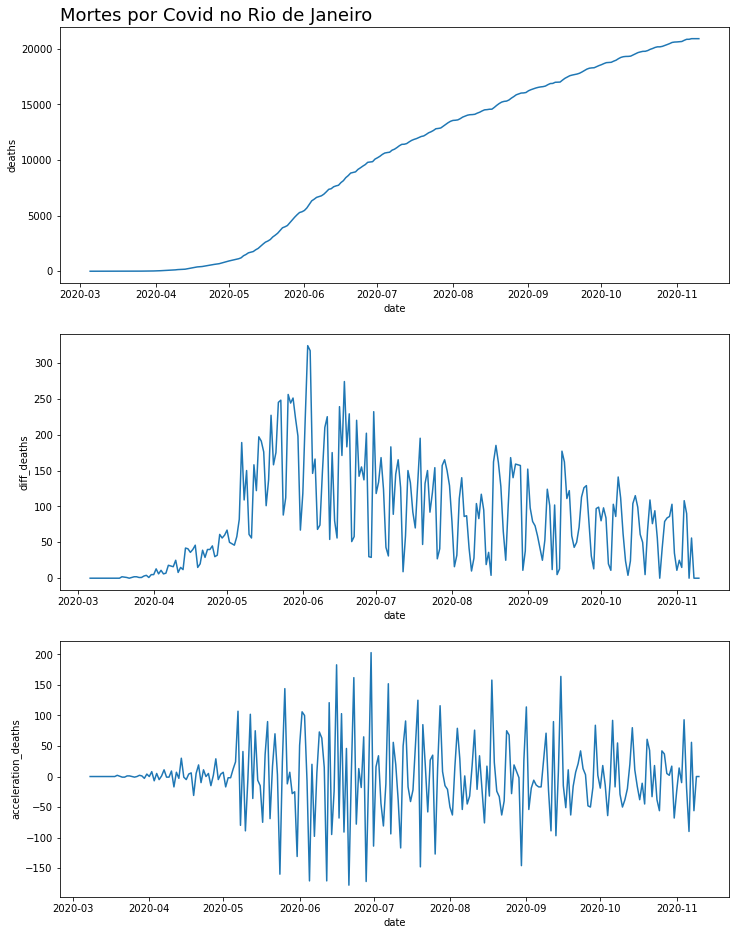

In [540]:
plot_comparacao('date', 'deaths', 'diff_deaths', 'acceleration_deaths', rio_de_janeiro, 'Mortes por Covid no Rio de Janeiro')

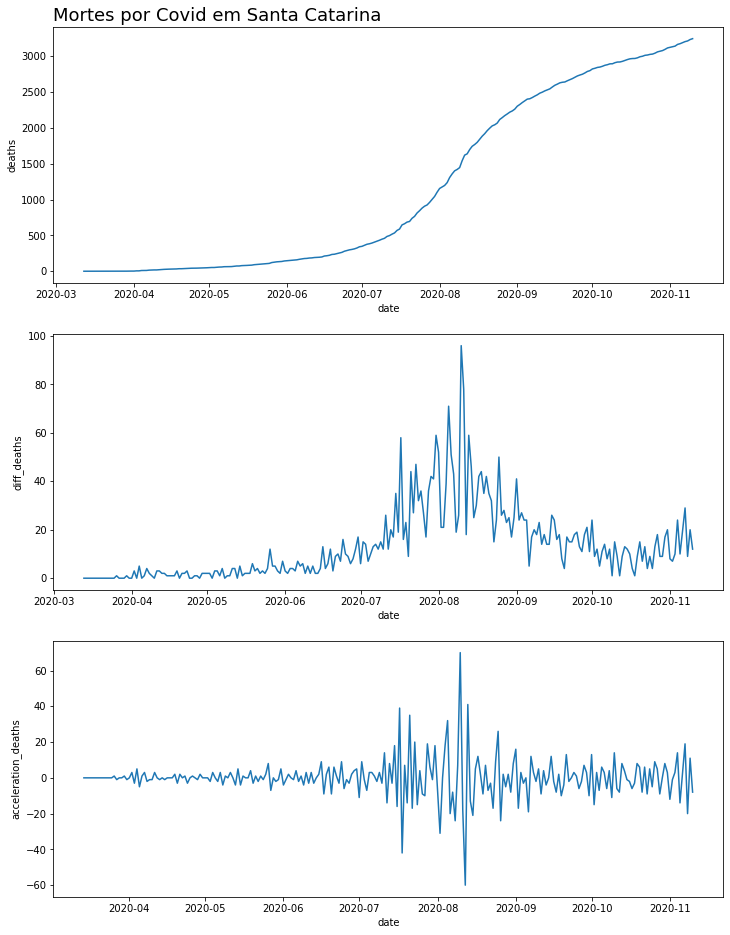

In [541]:
plot_comparacao('date', 'deaths', 'diff_deaths', 'acceleration_deaths', santa_catarina, 'Mortes por Covid em Santa Catarina')

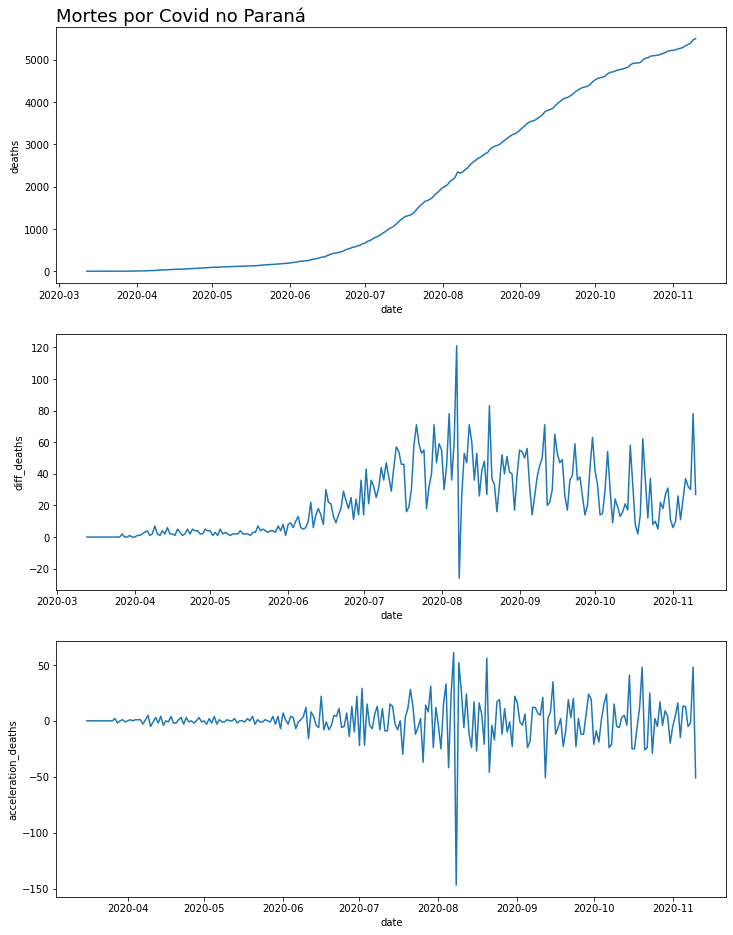

In [542]:
plot_comparacao('date', 'deaths', 'diff_deaths', 'acceleration_deaths', parana, 'Mortes por Covid no Paraná')

Uma possibilidade para este pico negativo no Paraná, que se repete no gráfico de casos confirmados, é a falta de boletim em alguma data, ou algum boletim com dados zerados, vamos ter que investigar

Uma hipótese possível, é que parte do ruído nas informações é a falta de boletins nos fins de semana, portanto vou criar uma coluna incluindo o dia da semana nos datasets dos estados, e verificar se há alguma sazonalidade semanal neles. Para isso vou usar um dos atributos de data das Series do Pandas, que considera Segunda-Feira = 0 e Domingo = 6

In [543]:
#incluindo o dia da semana nos datasets e se é ou não fim de semana nos datasets
for dataset in datasets:
  #cria a coluna de dia da semana usando um atributo do pandas Series (dt.weekday)
  dataset['weekday'] = dataset['date'].dt.weekday
  #criando uma coluna  com a informação se é ou não fim de semana, usando um list comprehension com if e else
  dataset['weekend'] = [False if weekday < 5 else True for weekday in dataset['weekday']] #preencha com False se weekday for menor que 5, senão preencha com True, para cada dado da série dados['weekday']

In [544]:
rio_de_janeiro.head()

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants,weekday,weekend
549291,2020-03-05,1,0,0.01,0.00,nan,nan,nan,nan,nan,nan,nan,nan,3,False
549290,2020-03-06,2,0,0.01,0.00,1.00,nan,0.00,nan,0.01,nan,0.00,nan,4,False
549289,2020-03-08,3,0,0.02,0.00,1.00,0.00,0.00,0.00,0.01,-0.00,0.00,0.00,6,True
549288,2020-03-12,15,0,0.09,0.00,12.00,11.00,0.00,0.00,0.07,0.06,0.00,0.00,3,False
549287,2020-03-15,24,0,0.14,0.00,9.00,-3.00,0.00,0.00,0.05,-0.02,0.00,0.00,6,True


In [545]:
#neste caso, como me parece uma informação interessante, vou incluir nos demais datasets também
dataframes = [dados, dados_municipio_mais_recentes, dados_por_cidade, dados_por_estado, ultimo_boletim_estadual, ultimo_boletim_municipal]
for dataset in dataframes:
  #cria a coluna de dia da semana usando um atributo do pandas Series (dt.weekday)
  dataset['weekday'] = dataset['date'].dt.weekday
  #criando uma coluna  com a informação se é ou não fim de semana, usando um list comprehension com if e else
  dataset['weekend'] = [False if weekday < 5 else True for weekday in dataset['weekday']] #preencha com False se weekday for menor que 5, senão preencha com True, para cada dado da série dados['weekday']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [546]:
#visualizando o que ocorreu em setembro em Santa Catarina para justificar o salto no gráfico
santa_catarina.query('date < "2020-09-20" and date > "2020-08-20"')[['date','diff_confirmed']]

,date,diff_confirmed
680259,2020-08-21,"1,277.00"
680258,2020-08-22,"1,659.00"
680257,2020-08-23,484.00
680256,2020-08-24,"1,041.00"
680255,2020-08-25,"2,157.00"
680254,2020-08-26,"1,870.00"
680253,2020-08-27,"2,078.00"
680252,2020-08-28,"2,054.00"
680251,2020-08-29,"4,712.00"
680250,2020-08-30,460.00


Em consulta ao G1 vemos que este aumento nos casos em Santa Catarina (mais de 30 mil casos em 31 de Agosto) se deve a um ajuste entre os casos reais e os casos reportados, devido a uma falha de sistema. Este dado não é relativo apenas ao dia de 31/08/2020, portanto justifica o salto desproporcional no gráfico

fonte: https://g1.globo.com/sc/santa-catarina/noticia/2020/08/31/sc-tem-mais-328-mil-casos-de-covid-19-confirmados-apos-falha-em-sistema-ser-identificada-pelo-governo.ghtml

In [547]:
#vamos ver agora o período de agosto para o Paraná, uma vez que também há um dado desproporcional aos demais
parana.query('date < "2020-08-20" and date > "2020-07-15"')[['date','diff_confirmed', 'weekday']]


,date,diff_confirmed,weekday
601006,2020-07-16,"2,281.00",3
601005,2020-07-17,"1,916.00",4
601004,2020-07-18,"2,232.00",5
601003,2020-07-19,"1,076.00",6
601002,2020-07-20,"1,280.00",0
601001,2020-07-21,"1,629.00",1
601000,2020-07-22,"2,389.00",2
600999,2020-07-23,"2,077.00",3
600998,2020-07-24,"2,255.00",4
600997,2020-07-25,"1,334.00",5


Vemos que a discrepância no dados paranaenses se dá num domingo, dia 26 de julho, vamos comparar com o boletim do dia anterior para ver se todos os dados são iguais. Caso seja, minha hipótese é de que houve uma repetição do boletim de sábado.

In [548]:
#buscando apenas os indexes onde constam os dados de 25/07 e 26/07
parana.query('index == 600997	 or index == 600996')

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants,weekday,weekend
600997,2020-07-25,65593,1653,569.54,14.35,"1,334.00",-921.00,55.00,2.00,11.58,-8.00,0.48,0.02,5,True
600996,2020-07-26,65593,1671,569.54,14.51,0.00,"-1,334.00",18.00,-37.00,0.00,-11.58,0.16,-0.32,6,True


apesar do número de casos confirmados realmente ser igual entre as duas datas, há uma alteração no número de mortes, o que não condiz com a minha hipótese de ser um boletim repetido.

#### Exclusão de outliers

Antes de estudar a média móvel e os valores por dia da semana, vou excluir tanto o boletim com aumento de 30mil de SC quanto o boletim sem aumento de dados no PR, pois por serem outliers, estão distorcendo nossos gráficos. Vou também refazer os gráficos acima sem estes dados


In [549]:
#excluindo o boletim de 26/07/2020 do PR
parana.drop(index=600996, inplace=True)

In [550]:
#excluindo o boletim de 31/08/2020 de SC
santa_catarina.drop(index=680249, inplace=True)

#### Usando a Média Móvel para reduzir o ruído nos dados

In [551]:
#criando uma nova variável no pd - função rolling, usando como especificação 7 pontos (dias) e aplicando a média
for dataset in datasets:
  #para os números absolutos
  dataset['media_movel_diff_confirmed'] = dataset['diff_confirmed'].rolling(7).mean()
  dataset['media_movel_diff_deaths'] = dataset['diff_deaths'].rolling(7).mean()
  #para os números relativos a 100 mil habitantes
  dataset['media_movel_diff_confirmed_100k'] = dataset['diff_confirmed_per_100k_inhabitants'].rolling(7).mean()
  dataset['media_movel_diff_deaths_100k'] = dataset['diff_deaths_covid_per_100K_inhabitants'].rolling(7).mean()

In [552]:
parana.head()

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants,weekday,weekend,media_movel_diff_confirmed,media_movel_diff_deaths,media_movel_diff_confirmed_100k,media_movel_diff_deaths_100k
601130,2020-03-12,6,0,0.05,0.00,nan,nan,nan,nan,nan,nan,nan,nan,3,False,nan,nan,nan,nan
601129,2020-03-13,6,0,0.05,0.00,0.00,nan,0.00,nan,0.00,nan,0.00,nan,4,False,nan,nan,nan,nan
601128,2020-03-16,6,0,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,False,nan,nan,nan,nan
601127,2020-03-17,12,0,0.10,0.00,6.00,6.00,0.00,0.00,0.05,0.05,0.00,0.00,1,False,nan,nan,nan,nan
601126,2020-03-18,14,0,0.12,0.00,2.00,-4.00,0.00,0.00,0.02,-0.03,0.00,0.00,2,False,nan,nan,nan,nan


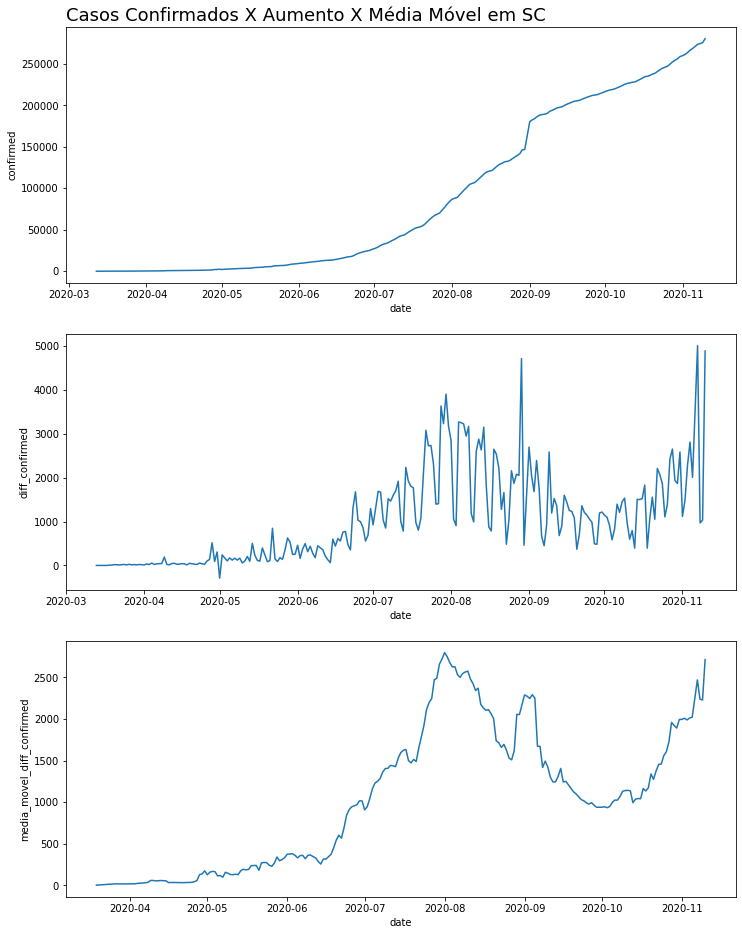

In [553]:
#plotando a comparação dos casos confirmados, o aumento diário e a média móvel de 7 dias
plot_comparacao('date', 'confirmed', 'diff_confirmed','media_movel_diff_confirmed', santa_catarina,'Casos Confirmados X Aumento X Média Móvel em SC')

A média móvel nos permite ver com mais clareza a linha de tendência da doença, pois reduz o ruído na informação. Veja que retirando o outlier, o gráfico fica muito mais legível em termos de tendência

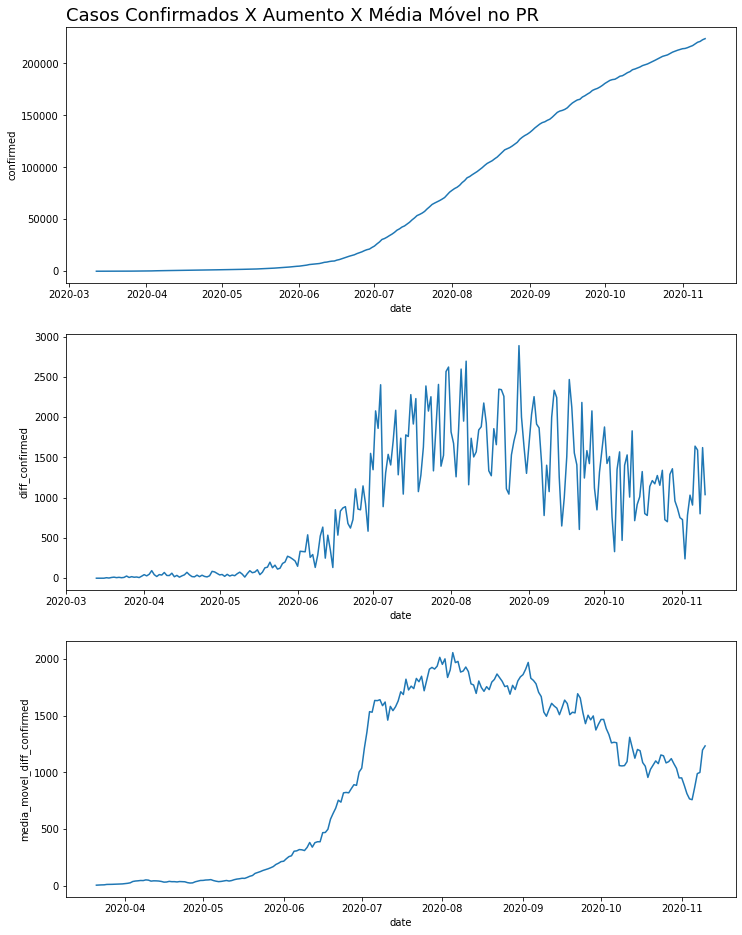

In [554]:
plot_comparacao('date', 'confirmed', 'diff_confirmed','media_movel_diff_confirmed', parana,'Casos Confirmados X Aumento X Média Móvel no PR')

No caso do Paraná, fica muito mais clara a visualização da curva quando apllicamos a média móvel, principalmente porque nela não temos a discrepância do boletim sem aumento de casos confirmados

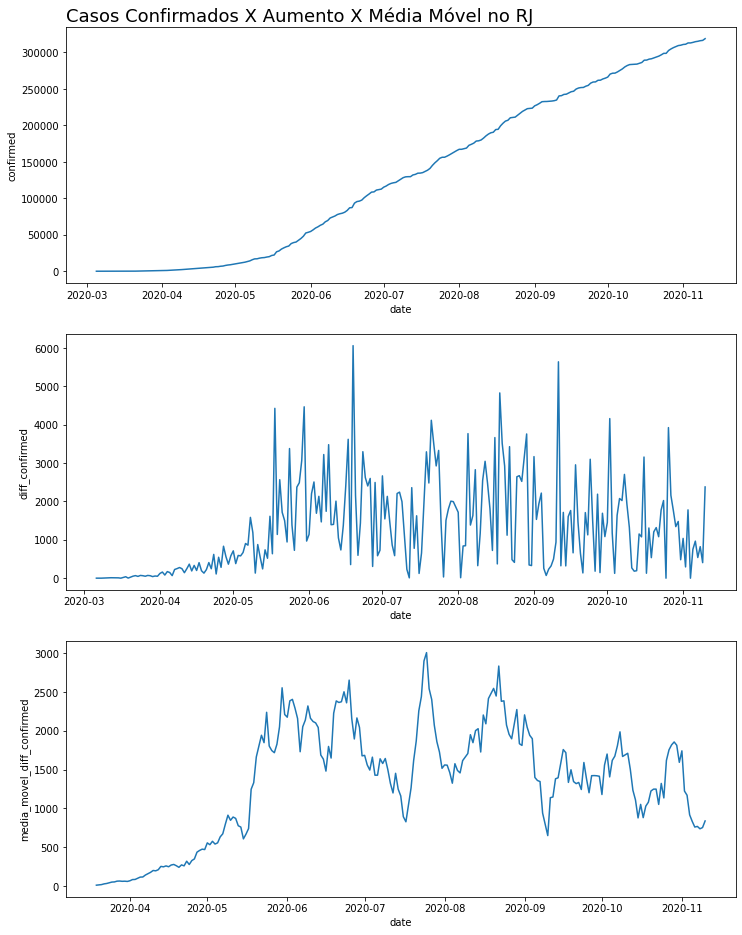

In [555]:
plot_comparacao('date', 'confirmed', 'diff_confirmed','media_movel_diff_confirmed', rio_de_janeiro,'Casos Confirmados X Aumento X Média Móvel no RJ')

No Rio de Janeiro vemos um pico de casos entre julho e agosto que pode valer a pena investigar mais a fundo. Comparando os três gráficos, vemos que no Rio de Janeiro a curva ascendente começou mais cedo do que nos estados do sul, e que o Paraná teve uma curva de aumento de casos bem acentuada em meados de junho, enquanto Santa Catarina teve o maior aumento (com exceção do dado de 31-08), entre julho e agosto

#### Aumento de casos e mortes por dia da semana

Neste caso, a intenção é ver se há alguma tendência por dia da semana

In [556]:
#agrupando os dados do RJ, PR e SC
rj_agrupado = rio_de_janeiro.groupby('weekday')[['diff_confirmed', 'diff_deaths']].mean().round()
pr_agrupado = parana.groupby('weekday')[['diff_confirmed', 'diff_deaths']].mean().round()
sc_agrupado = santa_catarina.groupby('weekday')[['diff_confirmed', 'diff_deaths']].mean().round()


In [557]:
rj_agrupado

,diff_confirmed,diff_deaths
weekday,,
0,943.00,38.00
1,"1,611.00",116.00
2,"1,617.00",114.00
3,"1,329.00",117.00
4,"1,835.00",99.00
5,"1,158.00",95.00
6,859.00,35.00


In [558]:
pr_agrupado

,diff_confirmed,diff_deaths
weekday,,
0,662.00,19.00
1,900.00,29.00
2,970.00,27.00
3,"1,088.00",27.00
4,"1,135.00",28.00
5,"1,041.00",17.00
6,730.00,13.00


In [559]:
sc_agrupado

,diff_confirmed,diff_deaths
weekday,,
0,599.00,12.00
1,"1,311.00",17.00
2,"1,260.00",14.00
3,"1,222.00",16.00
4,"1,137.00",14.00
5,"1,221.00",12.00
6,503.00,8.00


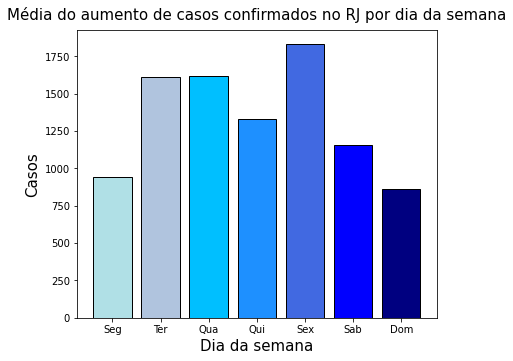

In [560]:
fig = plt.figure(figsize=(5,4)) #definindo o tamanho da figura
nome_dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']#criando as labels do eixo x
eixo = fig.add_axes([0,0,1,1])
cores = ['powderblue','lightsteelblue', 'deepskyblue',  'dodgerblue','royalblue', 'blue', 'navy'] #definindo as cores das barras
indice = range(len(rj_agrupado.index))# verificando a quantidade de barras
eixo.bar(indice,rj_agrupado.diff_confirmed, color=cores, edgecolor='k') #criando as barras
eixo.set_title('Média do aumento de casos confirmados no RJ por dia da semana', fontsize=15, pad=10)#definindo o título
eixo.set_xlabel('Dia da semana', fontsize=15) #definindo o rótulo do eixo X
eixo.set_ylabel('Casos', fontsize=15)#definindo o rótulo do eixo Y
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias);

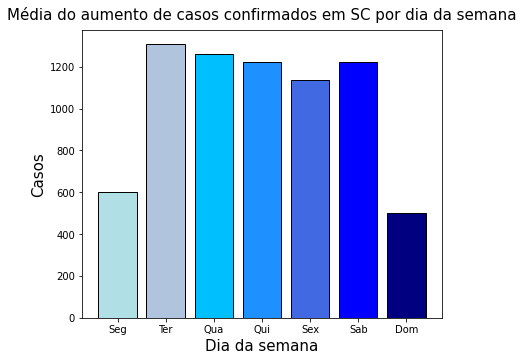

In [561]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
eixo.bar(indice,sc_agrupado.diff_confirmed, color=cores, edgecolor='k')
eixo.set_title('Média do aumento de casos confirmados em SC por dia da semana', fontsize=15, pad=10)
eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Casos', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias);

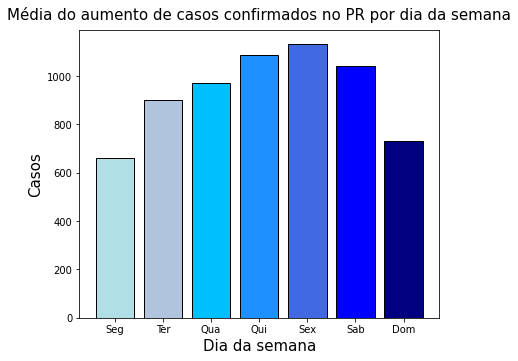

In [562]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(pr_agrupado.index))
eixo.bar(indice,pr_agrupado.diff_confirmed, color=cores, edgecolor='k')
eixo.set_title('Média do aumento de casos confirmados no PR por dia da semana', fontsize=15, pad=10)
eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Casos', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias);

Vemos que nos 3 estados domingo e segunda são dias com menor aumento de casos. Uma hipótese é a redução de testes feitos nestes dias. também vemos que Sexta e Sábado são os dias com maior aumento, o que pode significar mais testes (para sair de casa?)

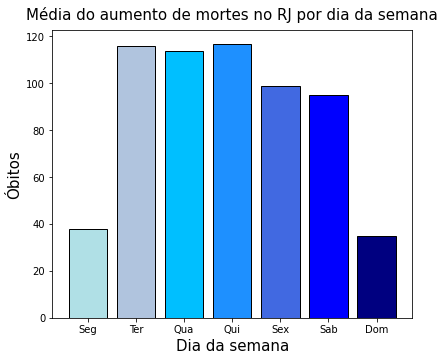

In [563]:
fig = plt.figure(figsize=(5,4)) #definindo o tamanho da figura
eixo = fig.add_axes([0,0,1,1])
eixo.bar(indice,rj_agrupado.diff_deaths, color=cores, edgecolor='k') #criando as barras
eixo.set_title('Média do aumento de mortes no RJ por dia da semana', fontsize=15, pad=10)#definindo o título
eixo.set_xlabel('Dia da semana', fontsize=15) #definindo o rótulo do eixo X
eixo.set_ylabel('Óbitos', fontsize=15)#definindo o rótulo do eixo Y
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias);

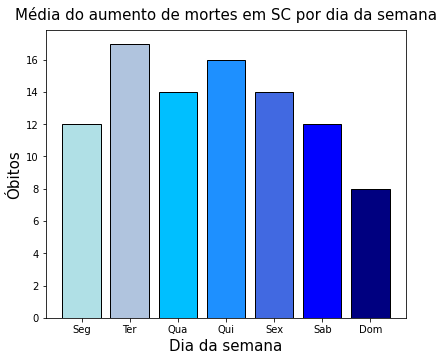

In [564]:
fig = plt.figure(figsize=(5,4)) #definindo o tamanho da figura
eixo = fig.add_axes([0,0,1,1])
eixo.bar(indice,sc_agrupado.diff_deaths, color=cores, edgecolor='k') #criando as barras
eixo.set_title('Média do aumento de mortes em SC por dia da semana', fontsize=15, pad=10)#definindo o título
eixo.set_xlabel('Dia da semana', fontsize=15) #definindo o rótulo do eixo X
eixo.set_ylabel('Óbitos', fontsize=15)#definindo o rótulo do eixo Y
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias);

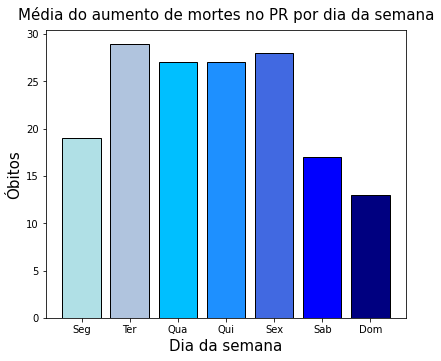

In [565]:
fig = plt.figure(figsize=(5,4)) #definindo o tamanho da figura
eixo = fig.add_axes([0,0,1,1])
eixo.bar(indice,pr_agrupado.diff_deaths, color=cores, edgecolor='k') #criando as barras
eixo.set_title('Média do aumento de mortes no PR por dia da semana', fontsize=15, pad=10)#definindo o título
eixo.set_xlabel('Dia da semana', fontsize=15) #definindo o rótulo do eixo X
eixo.set_ylabel('Óbitos', fontsize=15)#definindo o rótulo do eixo Y
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias);

#### Vendo as estatísticas descritivas dos dados dos estados escolhidos

In [566]:
#escolhi apenas as colunas de aumento para fazer a análise
rio_de_janeiro[['diff_confirmed', 'diff_deaths', 'diff_confirmed_per_100k_inhabitants',
               'diff_deaths_covid_per_100K_inhabitants']].describe()

,diff_confirmed,diff_deaths,diff_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants
count,240.00,240.00,240.00,240.00
mean,"1,328.97",87.10,7.65,0.50
std,"1,197.18",71.18,6.89,0.41
min,0.00,0.00,0.00,0.00
25%,316.50,27.75,1.82,0.16
50%,"1,079.00",75.00,6.21,0.43
75%,"2,024.00",134.75,11.65,0.78
max,"6,061.00",324.00,34.90,1.87


In [567]:
#escolhi apenas as colunas de aumento para fazer a análise
santa_catarina[['diff_confirmed', 'diff_deaths', 'diff_confirmed_per_100k_inhabitants',
               'diff_deaths_covid_per_100K_inhabitants']].describe()

,diff_confirmed,diff_deaths,diff_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants
count,241.00,241.00,241.00,241.00
mean,"1,035.79",13.35,14.28,0.18
std,"1,025.90",15.25,14.15,0.21
min,-290.00,0.00,-4.00,0.00
25%,141.00,2.00,1.94,0.03
50%,826.00,9.00,11.39,0.12
75%,"1,557.00",18.00,21.47,0.25
max,"5,008.00",96.00,69.05,1.32


In [568]:
#escolhi apenas as colunas de aumento para fazer a análise
parana[['diff_confirmed', 'diff_deaths', 'diff_confirmed_per_100k_inhabitants',
               'diff_deaths_covid_per_100K_inhabitants']].describe()

,diff_confirmed,diff_deaths,diff_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants
count,240.00,240.00,240.00,240.00
mean,932.77,22.83,8.10,0.20
std,795.63,21.81,6.91,0.19
min,0.00,-26.00,0.00,-0.23
25%,77.50,4.00,0.67,0.03
50%,871.00,17.00,7.56,0.15
75%,"1,560.25",37.00,13.55,0.32
max,"2,890.00",121.00,25.09,1.05


In [569]:
#buscando a data com aumento negativo
santa_catarina.query('diff_confirmed == diff_confirmed.min()')

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants,weekday,weekend,media_movel_diff_confirmed,media_movel_diff_deaths,media_movel_diff_confirmed_100k,media_movel_diff_deaths_100k
680371,2020-05-01,2104,50,29.01,0.69,-290.00,-599.00,2.00,0.00,-4.00,-8.26,0.03,0.00,4,False,127.86,1.14,1.76,0.02


In [570]:
#buscando o período para visualizar o dia que gerou o aumento negativo
santa_catarina.query('date > "2020-04-25" and date < "2020-05-04"')

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants,weekday,weekend,media_movel_diff_confirmed,media_movel_diff_deaths,media_movel_diff_confirmed_100k,media_movel_diff_deaths_100k
680376,2020-04-26,1337,43,18.44,0.59,102.00,76.00,1.00,1.00,1.41,1.05,0.01,0.01,6,True,44.57,1.14,0.61,0.02
680375,2020-04-27,1476,44,20.35,0.61,139.00,37.00,1.00,0.00,1.92,0.51,0.01,0.00,0,False,59.00,1.29,0.81,0.02
680374,2020-04-28,1995,44,27.51,0.61,519.00,380.00,0.00,-1.00,7.16,5.24,0.00,-0.01,1,False,129.14,1.00,1.78,0.01
680373,2020-04-29,2085,46,28.75,0.63,90.00,-429.00,2.00,2.00,1.24,-5.92,0.03,0.03,2,False,138.57,1.00,1.91,0.01
680372,2020-04-30,2394,48,33.01,0.66,309.00,219.00,2.00,0.00,4.26,3.02,0.03,-0.00,3,False,174.86,0.86,2.41,0.01
680371,2020-05-01,2104,50,29.01,0.69,-290.00,-599.00,2.00,0.00,-4.00,-8.26,0.03,0.00,4,False,127.86,1.14,1.76,0.02
680370,2020-05-02,2346,52,32.35,0.72,242.00,532.00,2.00,0.00,3.34,7.34,0.03,-0.00,5,True,158.71,1.43,2.19,0.02
680369,2020-05-03,2519,52,34.73,0.72,173.00,-69.00,0.00,-2.00,2.39,-0.95,0.00,-0.03,6,True,168.86,1.29,2.33,0.02


In [571]:
#buscando a data com aumento negativo
parana.query('diff_deaths == diff_deaths.min()')

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants,weekday,weekend,media_movel_diff_confirmed,media_movel_diff_deaths,media_movel_diff_confirmed_100k,media_movel_diff_deaths_100k
600983,2020-08-08,91127,2319,791.25,20.14,"1,161.00","-1,536.00",-26.00,-147.00,10.08,-13.34,-0.23,-1.28,5,True,"1,885.29",49.14,16.37,0.43


In [572]:
#buscando o período para visualizar o dia que gerou o aumento negativo
parana.query('date > "2020-08-03" and date < "2020-08-09"')

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,acceleration_confirmed,diff_deaths,acceleration_deaths,diff_confirmed_per_100k_inhabitants,acceleration_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,acceleration_deaths_covid_per_100K_inhabitants,weekday,weekend,media_movel_diff_confirmed,media_movel_diff_deaths,media_movel_diff_confirmed_100k,media_movel_diff_deaths_100k
600987,2020-08-04,82718,2128,718.24,18.48,"1,853.00",593.00,78.00,33.00,16.09,5.15,0.68,0.29,1,False,"1,903.57",55.00,16.53,0.48
600986,2020-08-05,85317,2164,740.80,18.79,"2,599.00",746.00,36.00,-42.00,22.57,6.48,0.31,-0.36,2,False,"2,056.71",50.00,17.86,0.43
600985,2020-08-06,87269,2224,757.75,19.31,"1,952.00",-647.00,60.00,24.00,16.95,-5.62,0.52,0.21,3,False,"1,968.71",51.86,17.09,0.45
600984,2020-08-07,89966,2345,781.17,20.36,"2,697.00",745.00,121.00,61.00,23.42,6.47,1.05,0.53,4,False,"1,979.14",60.71,17.18,0.53
600983,2020-08-08,91127,2319,791.25,20.14,"1,161.00","-1,536.00",-26.00,-147.00,10.08,-13.34,-0.23,-1.28,5,True,"1,885.29",49.14,16.37,0.43


#### Comparando os estados pelas médias móveis dos dados de aumento com os números absolutos

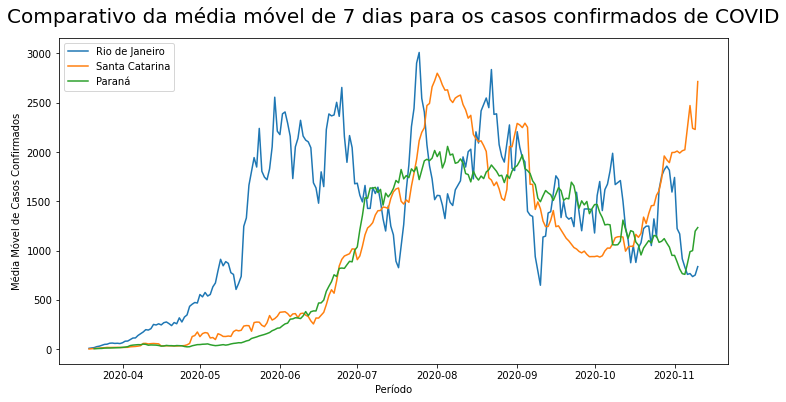

In [595]:
import datetime
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='media_movel_diff_confirmed', data=rio_de_janeiro)
sns.lineplot(x='date', y='media_movel_diff_confirmed', data=santa_catarina)
sns.lineplot(x='date', y='media_movel_diff_confirmed', data=parana)
plt.legend(('Rio de Janeiro', 'Santa Catarina', 'Paraná'))
plt.title('Comparativo da média móvel de 7 dias para os casos confirmados de COVID', fontsize=20, pad=15)
plt.xlabel('Período')
plt.ylabel('Média Móvel de Casos Confirmados')
plt.show()

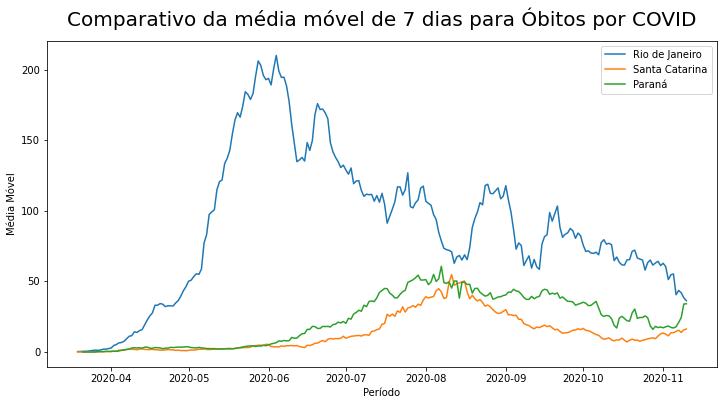

In [574]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='media_movel_diff_deaths', data=rio_de_janeiro)
sns.lineplot(x='date', y='media_movel_diff_deaths', data=santa_catarina)
sns.lineplot(x='date', y='media_movel_diff_deaths', data=parana)
plt.legend(('Rio de Janeiro', 'Santa Catarina', 'Paraná'))
plt.title('Comparativo da média móvel de 7 dias para Óbitos por COVID', fontsize=20, pad=15)
plt.xlabel('Período')
plt.ylabel('Média Móvel')
plt.show()

#### Comparando os estados pelas médias móveis dos dados de aumento com os números relativos por 100 mil habitantes

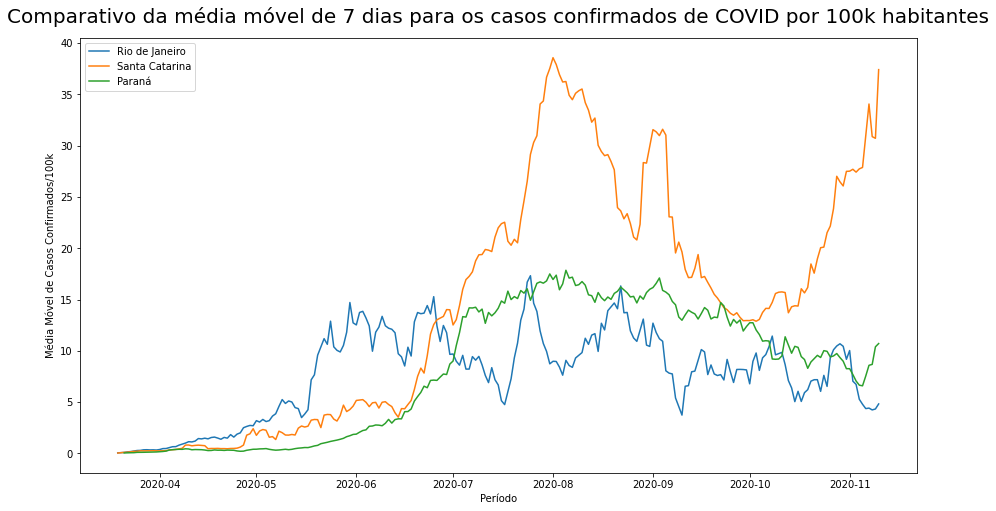

In [575]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='media_movel_diff_confirmed_100k', data=rio_de_janeiro)
sns.lineplot(x='date', y='media_movel_diff_confirmed_100k', data=santa_catarina)
sns.lineplot(x='date', y='media_movel_diff_confirmed_100k', data=parana)
plt.legend(('Rio de Janeiro', 'Santa Catarina', 'Paraná'))
plt.title('Comparativo da média móvel de 7 dias para os casos confirmados de COVID por 100k habitantes', fontsize=20, pad=15)
plt.xlabel('Período')
plt.ylabel('Média Móvel de Casos Confirmados/100k')
plt.show()

Vemos que ao ajustar os dados proporcionalmente (por 100 mil habitantes) há muito mais casos confirmados para Santa Catarina que para o Rio de Janeiro.

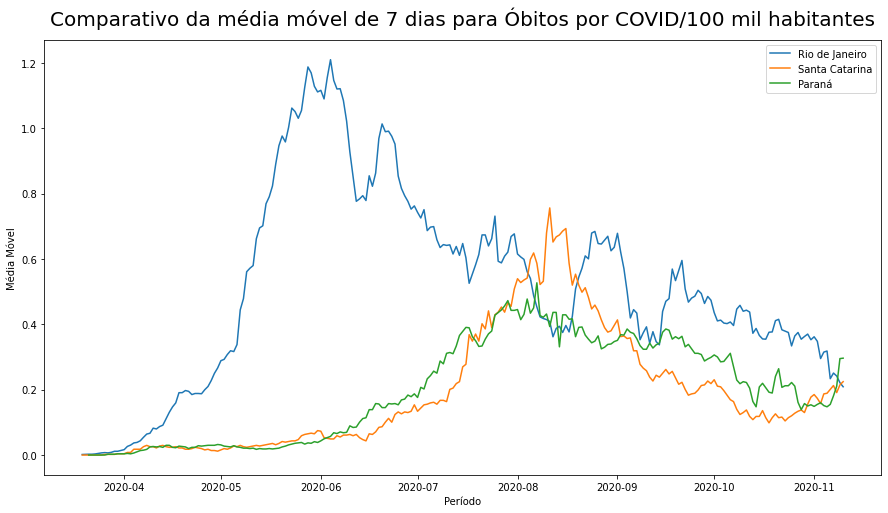

In [576]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='media_movel_diff_deaths_100k', data=rio_de_janeiro)
sns.lineplot(x='date', y='media_movel_diff_deaths_100k', data=santa_catarina)
sns.lineplot(x='date', y='media_movel_diff_deaths_100k', data=parana)
plt.legend(('Rio de Janeiro', 'Santa Catarina', 'Paraná'))
plt.title('Comparativo da média móvel de 7 dias para Óbitos por COVID/100 mil habitantes', fontsize=20, pad=15)
plt.xlabel('Período')
plt.ylabel('Média Móvel')
plt.show()

Podemos ver claramente a maior taxa de mortalidade no Rio de Janeiro, quando ajustamos os dados para 100mil habitantes. Vemos também claramente que o pico de óbitos no Rio de Janeiro ocorreu muito antes dos dos estados do Sul.

### Vamos comparar agora as capitais destes estados, para ver se a distribuição é a mesma


In [577]:
#os datasets serão organizados por data
colunas = ['date', 'confirmed', 'deaths', 'confirmed_per_100k_inhabitants', 'deaths_covid_per_100K_inhabitants']
rio_de_janeiro_city = dados_por_cidade_definida.query('city == "Rio de Janeiro"').sort_values('date')[colunas]
floripa = dados_por_cidade_definida.query('city == "Florianópolis"').sort_values('date')[colunas]
curitiba = dados_por_cidade_definida.query('city == "Curitiba"').sort_values('date')[colunas]

In [578]:
rio_de_janeiro_city.shape

(226, 5)

In [579]:
floripa.shape

(236, 5)

In [580]:
curitiba.shape

(220, 5)

In [581]:
#criar as colunas de aumento, dia de semana, fim de semana e médias móveis para estes 3 novos datasets
datasets_capitais = [rio_de_janeiro_city, floripa, curitiba]
columns = ['confirmed', 'deaths', 'confirmed_per_100k_inhabitants', 'deaths_covid_per_100K_inhabitants']
for dataset in datasets_capitais: #para cada dataset da minha lista
  for column in columns: #para cada coluna na minha lista de colunas
    dataset[f'diff_{column}'] = dataset[column].diff() #crie uma coluna de aumento
    dataset[f'media_movel_diff_{column}'] = dataset[f'diff_{column}'].rolling(7).mean()
  #cria a coluna de dia da semana usando um atributo do pandas Series (dt.weekday)
  dataset['weekday'] = dataset['date'].dt.weekday
  #criando uma coluna  com a informação se é ou não fim de semana, usando um list comprehension com if e else
  dataset['weekend'] = [False if weekday < 5 else True for weekday in dataset['weekday']] 



In [582]:
#vendo se deu certo
curitiba.head()

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,media_movel_diff_confirmed,diff_deaths,media_movel_diff_deaths,diff_confirmed_per_100k_inhabitants,media_movel_diff_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,media_movel_diff_deaths_covid_per_100K_inhabitants,weekday,weekend
615683,2020-03-12,5,0,0.26,0.00,nan,nan,nan,nan,nan,nan,nan,nan,3,False
615682,2020-03-13,5,0,0.26,0.00,0.00,nan,0.00,nan,0.00,nan,0.00,nan,4,False
615681,2020-03-16,5,0,0.26,0.00,0.00,nan,0.00,nan,0.00,nan,0.00,nan,0,False
615680,2020-03-17,7,0,0.36,0.00,2.00,nan,0.00,nan,0.10,nan,0.00,nan,1,False
615679,2020-03-18,8,0,0.41,0.00,1.00,nan,0.00,nan,0.05,nan,0.00,nan,2,False


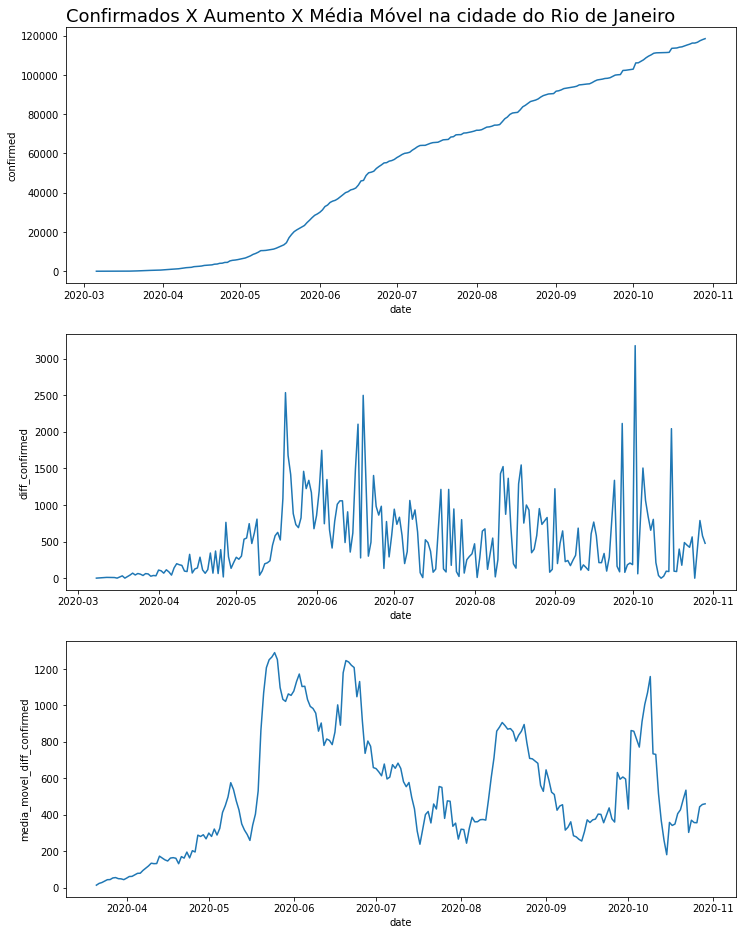

In [583]:
#plot comparativo casos confirmados na cidade do rio de janeiro
plot_comparacao('date', 'confirmed', 'diff_confirmed', 'media_movel_diff_confirmed',
                rio_de_janeiro_city, 'Confirmados X Aumento X Média Móvel na cidade do Rio de Janeiro')

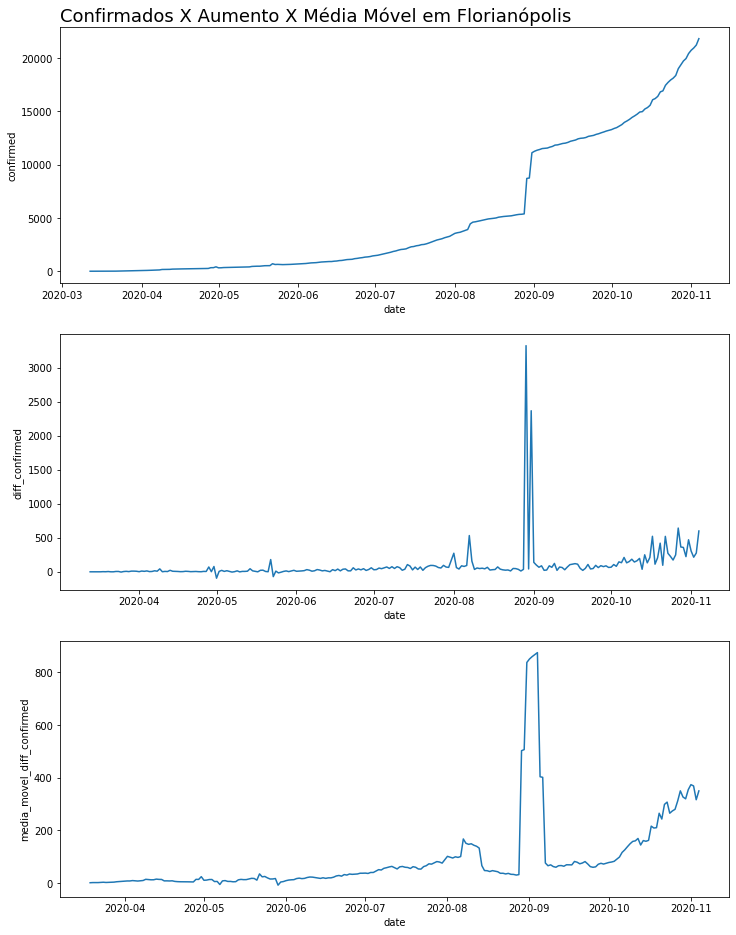

In [584]:
#plot comparativo casos confirmados em Florianópolis
plot_comparacao('date', 'confirmed', 'diff_confirmed', 'media_movel_diff_confirmed',
                floripa, 'Confirmados X Aumento X Média Móvel em Florianópolis')

In [585]:
#vemos que em Floripa tem a mesma discrepância que no boletim estadual. Vamos retirar este dado
floripa.query('date >= "2020-08-20" and date <= "2020-09-5"')

,date,confirmed,deaths,confirmed_per_100k_inhabitants,deaths_covid_per_100K_inhabitants,diff_confirmed,media_movel_diff_confirmed,diff_deaths,media_movel_diff_deaths,diff_confirmed_per_100k_inhabitants,media_movel_diff_confirmed_per_100k_inhabitants,diff_deaths_covid_per_100K_inhabitants,media_movel_diff_deaths_covid_per_100K_inhabitants,weekday,weekend
695186,2020-08-20,5139,100,"1,009.97",19.65,29.00,42.43,0.00,2.00,5.70,8.34,0.00,0.39,3,False
695185,2020-08-21,5163,103,"1,014.69",20.24,24.00,36.43,3.00,2.00,4.72,7.16,0.59,0.39,4,False
695184,2020-08-22,5190,104,"1,020.00",20.44,27.00,36.57,1.00,2.00,5.31,7.19,0.20,0.39,5,True
695183,2020-08-23,5203,105,"1,022.55",20.64,13.00,34.00,1.00,2.00,2.55,6.68,0.20,0.39,6,True
695182,2020-08-24,5252,106,"1,032.18",20.83,49.00,36.14,1.00,1.43,9.63,7.10,0.20,0.28,0,False
695181,2020-08-25,5299,108,"1,041.42",21.23,47.00,32.57,2.00,1.57,9.24,6.40,0.39,0.31,1,False
695180,2020-08-26,5335,111,"1,048.49",21.81,36.00,32.14,3.00,1.57,7.08,6.32,0.59,0.31,2,False
695179,2020-08-27,5347,113,"1,050.85",22.21,12.00,29.71,2.00,1.86,2.36,5.84,0.39,0.36,3,False
695178,2020-08-28,5383,117,"1,057.93",22.99,36.00,31.43,4.00,2.00,7.08,6.18,0.79,0.39,4,False
695177,2020-08-29,8708,116,"1,711.39",22.80,"3,325.00",502.57,-1.00,1.71,653.47,98.77,-0.20,0.34,5,True


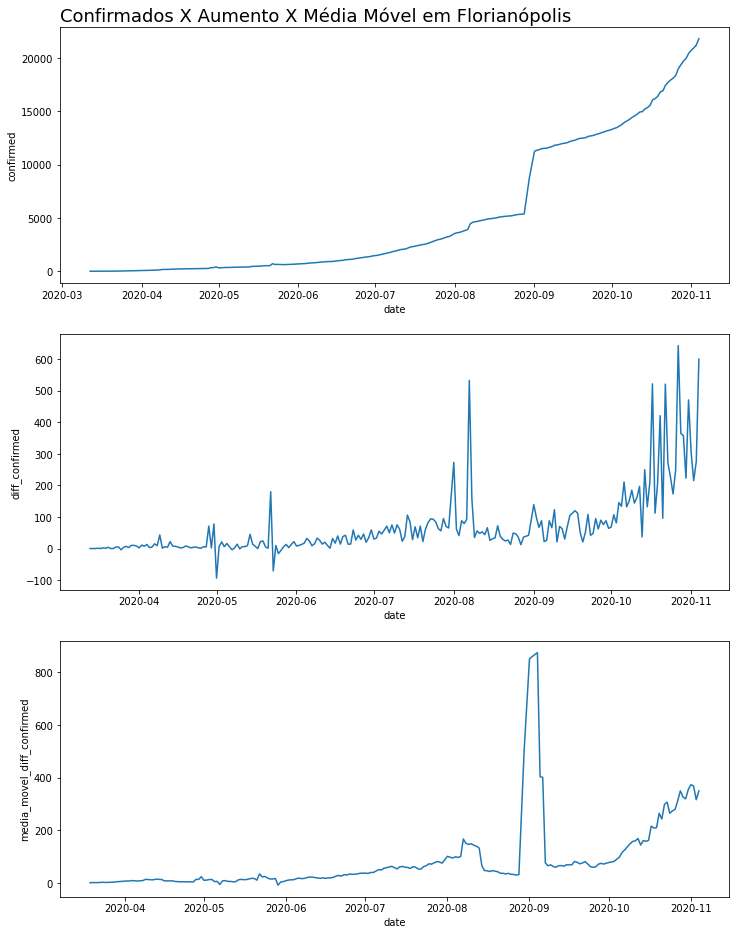

In [586]:
#tirando o dado e refazendo o gráfico
floripa.drop(index=695175, inplace=True)
floripa.drop(index=695177, inplace=True)
#plot comparativo casos confirmados em Florianópolis
plot_comparacao('date', 'confirmed', 'diff_confirmed', 'media_movel_diff_confirmed',
                floripa, 'Confirmados X Aumento X Média Móvel em Florianópolis')

Neste caso, excluimos dois outliers para visualizar melhor os dados de aumento, mas não houve grande impacto no gráfico de média móvel pois ele ainda leva em conta os valores dos outliers

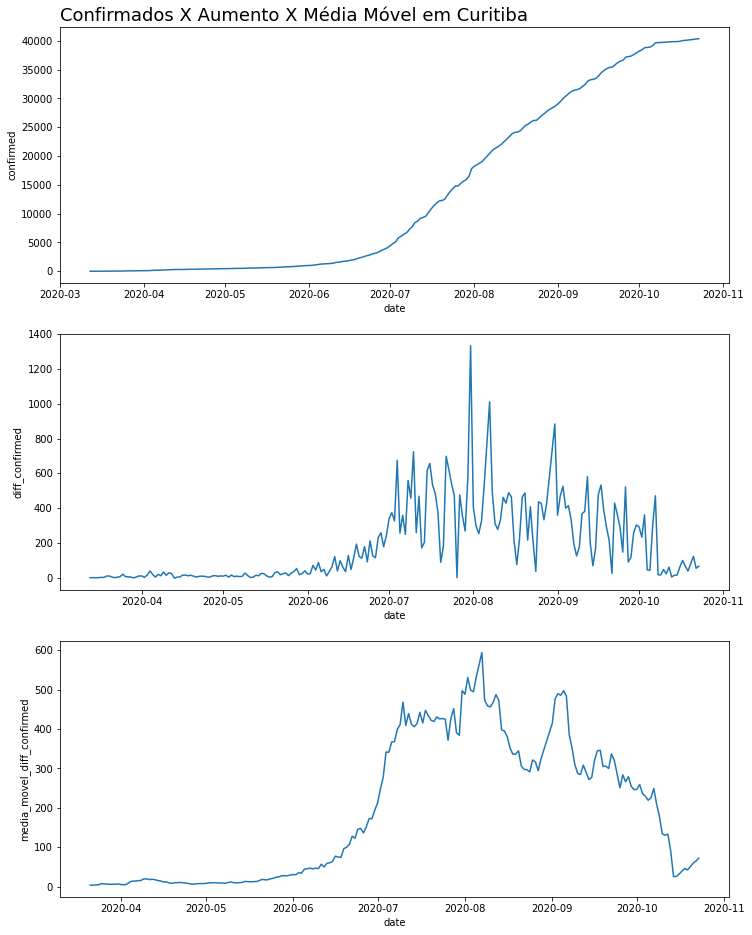

In [587]:
#plot comparativo casos confirmados em Curitiba
plot_comparacao('date', 'confirmed', 'diff_confirmed', 'media_movel_diff_confirmed',
                curitiba, 'Confirmados X Aumento X Média Móvel em Curitiba')

Comparando os dados por capital usando a média móvel por 100k habitantes. A análise de Florianópolis e Santa Catarina ficam prejudicadas pelo pico causado pelo ajuste de sistema. Faremos gráficos considerando somente os dados após agosto para uma análise mais justa

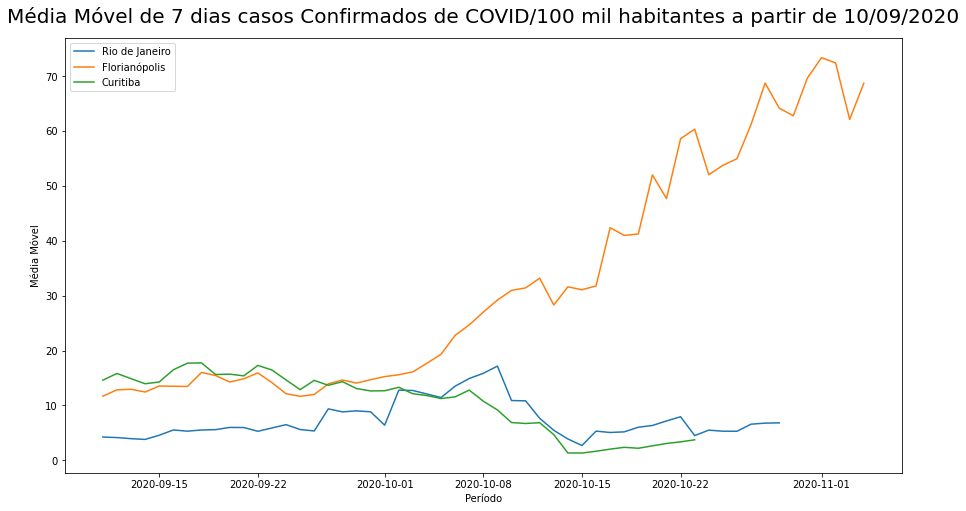

In [588]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='media_movel_diff_confirmed_per_100k_inhabitants', data=rio_de_janeiro_city.query('date > "2020-09-10"'))
sns.lineplot(x='date', y='media_movel_diff_confirmed_per_100k_inhabitants', data=floripa.query('date > "2020-09-10"'))
sns.lineplot(x='date', y='media_movel_diff_confirmed_per_100k_inhabitants', data=curitiba.query('date > "2020-09-10"'))
plt.legend(('Rio de Janeiro', 'Florianópolis', 'Curitiba'))
plt.title('Média Móvel de 7 dias casos Confirmados de COVID/100 mil habitantes a partir de 10/09/2020', fontsize=20, pad=15)
plt.xlabel('Período')
plt.ylabel('Média Móvel')
plt.show()

In [589]:
curitiba.columns

Index(['date', 'confirmed', 'deaths', 'confirmed_per_100k_inhabitants',
       'deaths_covid_per_100K_inhabitants', 'diff_confirmed',
       'media_movel_diff_confirmed', 'diff_deaths', 'media_movel_diff_deaths',
       'diff_confirmed_per_100k_inhabitants',
       'media_movel_diff_confirmed_per_100k_inhabitants',
       'diff_deaths_covid_per_100K_inhabitants',
       'media_movel_diff_deaths_covid_per_100K_inhabitants', 'weekday',
       'weekend'],
      dtype='object')

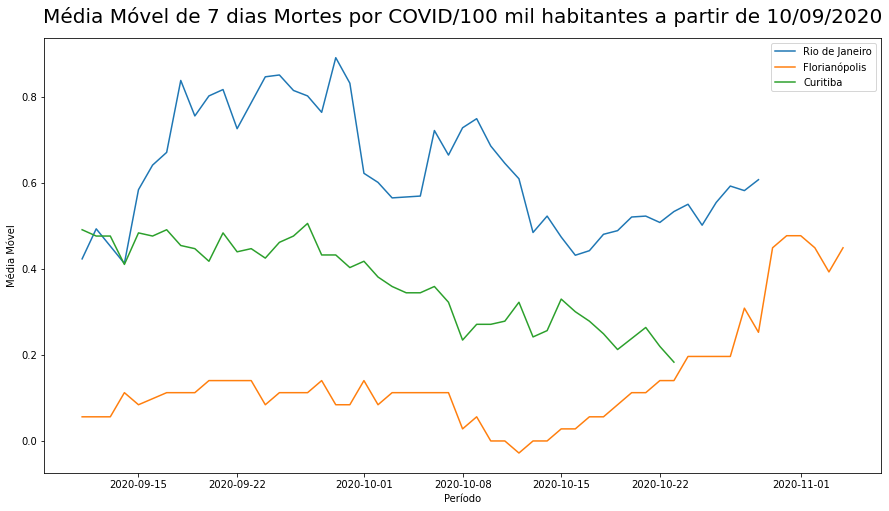

In [590]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='media_movel_diff_deaths_covid_per_100K_inhabitants', data=rio_de_janeiro_city.query('date > "2020-09-10"'))
sns.lineplot(x='date', y='media_movel_diff_deaths_covid_per_100K_inhabitants', data=floripa.query('date > "2020-09-10"'))
sns.lineplot(x='date', y='media_movel_diff_deaths_covid_per_100K_inhabitants', data=curitiba.query('date > "2020-09-10"'))
plt.legend(('Rio de Janeiro', 'Florianópolis', 'Curitiba'))
plt.title('Média Móvel de 7 dias Mortes por COVID/100 mil habitantes a partir de 10/09/2020', fontsize=20, pad=15)
plt.xlabel('Período')
plt.ylabel('Média Móvel')
plt.show()

Vemos que as mortes e casos confirmados de COVID estão aumentando de forma preocupante em Florianópolis